<div style="background-color: darkslategray; color: white; padding: 15px; border-radius: 8px;">
    <center><h1 style="font-family: Arial, sans-serif;">TO GRANT OR NOT TOGRANT: DECIDING ON COMPENSATION BENEFITS</h1></center>
    <center><h3 style="font-family: Arial, sans-serif;">Machine Learning Project</h3></center>
</div>

**<h3>Table of Contents</h3>**
* [1. Environment Setup](#1.-Environment-Setup)
    * [1.1 Importing Libraries](#1.1-Importing-Libraries)
    * [1.2 Importing the data set](#1.2-Importing-the-data-set)
* [2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
    * [2.1 General analysis of the data set](#2.1-General-analysis-of-the-data-set)
    * [2.1.1 Treating duplicates](#2.1.1-Treating-duplicates)
    * [2.1.2 Missing Values](#2.1.2-Missing-Values)
    * [2.1.3 Type conversion](#2.1.3-type-conversion)
    * [2.1.4 Visual Exploration](#2.1.4-visual-exploration)
    * [2.1.5 Numerical features- Univariate analysis](#215-numerical-features---univariate-analysis)
    * [2.1.6 Categorical Features- Univariate Analysis](#216-categorical-features--univariate-analysis)
    * [2.1.7 Multivariate Analysis](#217-multivariate-analysis)
    * [2.1.8 Feature Engineering](#218-feature-engineering)

## 1. Environment Setup

### 1.1 Importing libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1.2 Importing the data set

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
train_data = pd.read_csv('train_data.csv', index_col='Claim Identifier')


C:\Users\inesm\AppData\Local\Temp\ipykernel_10096\330998473.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train_data.csv', index_col='Claim Identifier')


In [5]:
#drop target variable
df = train_data.drop(columns='Claim Injury Type')

## 2. Exploratory Data Analysis

### 2.1 General analysis of the data set

In [6]:
df.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [7]:
df.tail()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165075,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120584215,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818961390,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(593471, 31)

Surprise we have a whole fucking lot of features with Dtype object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  County of Injury      

we can drop "OIICS Nature of Injury Description" because it doesn´t have any values

In [10]:
df.drop('OIICS Nature of Injury Description', axis=1,inplace=True)

In [11]:
df.describe(include='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
count,570337,574026.000000,574026,593471,574026,5.453750e+05,544948.000000,559466,187245,574026,574026,574026,574026,574026,150798,574026,132803.000000,564068.000000,564068,574026,558386.000000,558386,558369.000000,558369,556944.000000,556944,545389,574026.000000,574026,574026.000000
unique,5539,NaN,3,1096,2,NaN,NaN,2475,1648,2046,8,63,2,8,1094,4,NaN,NaN,20,5,NaN,74,NaN,56,NaN,54,10060,NaN,1,NaN
top,2020-03-01,NaN,N,2020-03-06,N,NaN,NaN,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,SUFFOLK,N,NYC,2022-04-15,M,NaN,NaN,HEALTH CARE AND SOCIAL ASSISTANCE,IV,NaN,LIFTING,NaN,STRAIN OR TEAR,NaN,LOWER BACK AREA,11236,NaN,Not Work Related,NaN
freq,1245,NaN,571412,1422,392291,NaN,NaN,1847,350,111144,285368,60430,546505,270779,440,335218,NaN,NaN,114339,265981,NaN,46610,NaN,153373,NaN,51862,3302,NaN,574026,NaN
mean,NaN,42.114270,NaN,NaN,NaN,4.910883e+02,1886.767604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.207337,58.645305,NaN,NaN,54.381143,NaN,41.013839,NaN,39.738146,NaN,NaN,0.046665,NaN,3.006559
std,NaN,14.256432,NaN,NaN,NaN,6.092918e+03,414.644423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.832303,19.644175,NaN,NaN,25.874281,NaN,22.207521,NaN,22.365940,NaN,NaN,0.210921,NaN,2.000801
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,11.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,31.000000,NaN,NaN,NaN,0.000000e+00,1965.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,45.000000,NaN,NaN,31.000000,NaN,16.000000,NaN,33.000000,NaN,NaN,0.000000,NaN,1.000000
50%,NaN,42.000000,NaN,NaN,NaN,0.000000e+00,1977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,61.000000,NaN,NaN,56.000000,NaN,49.000000,NaN,38.000000,NaN,NaN,0.000000,NaN,3.000000
75%,NaN,54.000000,NaN,NaN,NaN,8.410000e+02,1989.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,71.000000,NaN,NaN,75.000000,NaN,52.000000,NaN,53.000000,NaN,NaN,0.000000,NaN,5.000000


### 2.1.1 Treating duplicates

We have duplicate values that need to be removed

In [12]:
#duplicated values
df.duplicated().sum()

18351

Since this all the claims have _`Assembly Date`_ we can assume that in order to have a claim you always have a _`Claim Identifier`_ (that we use as index) and an _`Assembly Date`_. So let's check the rows that only have _`Assembly Date`_ filled, i.e, empty rows.

In [13]:

only_assembly_date = df.drop(columns=['Assembly Date']).isnull().all(axis=1) & df['Assembly Date'].notnull()


num_only_assembly_date_filled = only_assembly_date.sum()
print(f"Number of rows with only 'Assembly Date' filled: {num_only_assembly_date_filled}")

Number of rows with only 'Assembly Date' filled: 19445


### 2.1.2 Missing Values

In [14]:
df.isnull().sum()/df.shape[0]*100

Accident Date                         3.898084
Age at Injury                         3.276487
Alternative Dispute Resolution        3.276487
Assembly Date                         0.000000
Attorney/Representative               3.276487
Average Weekly Wage                   8.104187
Birth Year                            8.176137
C-2 Date                              5.729850
C-3 Date                             68.449174
Carrier Name                          3.276487
Carrier Type                          3.276487
County of Injury                      3.276487
COVID-19 Indicator                    3.276487
District Name                         3.276487
First Hearing Date                   74.590502
Gender                                3.276487
IME-4 Count                          77.622664
Industry Code                         4.954412
Industry Code Description             4.954412
Medical Fee Region                    3.276487
WCIO Cause of Injury Code             5.911831
WCIO Cause of

In [15]:
train_data['C-3 Date'].value_counts(dropna=False)
len(train_data['C-3 Date'].unique())

1649

In [16]:
train_data['First Hearing Date'].value_counts(dropna=False)

print(len(train_data['First Hearing Date'].unique()))

1095


In [17]:
train_data['IME-4 Count'].value_counts(dropna=False)

print(len(train_data['IME-4 Count'].unique()))

42


In [18]:
df.describe(include='O')
  

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574026,593471,574026,559466,187245,574026,574026,574026,574026,574026,150798,574026,564068,574026,558386,558369,556944,545389,574026
unique,5539,3,1096,2,2475,1648,2046,8,63,2,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,SUFFOLK,N,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571412,1422,392291,1847,350,111144,285368,60430,546505,270779,440,335218,114339,265981,46610,153373,51862,3302,574026


### Observations

#### Missing Values ####
OIICS Nature of Injury Description has no values

_`IME-4 Count`_, _`First Hearing Date`_ and _`C-3 Date`_ have >50% of entries missing ( 77.6%, 74.5 and 68.4%, respectively)

#### Single Value Feature ####
The feature _`WCB Decision`_ only has one value along the whole dataset (excluding missing values of course)

#### Categorical features that could be represented as boolean ####
Some categorical variables that only present 2 unique values, usually '1s and 0s' or 'Y or N' could be changed to boolean. Since we are not doing data pre-processing yet, these changes would have to preserve any NaN data. The variables are:
- Agreement Reached (0s and 1s)
- Attorney/Representative (Y or N)
- COVID-19 Indicator (Y or N)

---

### 2.1.3 Type conversion
Here we are converting categorical variables that could be represented as boolean, meaning they only have two unique values, while still perserving the NaN entries present in the dataset.

In [19]:
#function to transform Y and N into boolean while preserving the NaNs
def transform_strings_in_bool(df, col_names):
    for col_name in col_names:
        df[col_name] = df[col_name].map({'Y': True, 'N': False, np.nan: np.nan})
    return df

In [20]:
# Agreement Reached only has values of  0s and 1s so lets convert it to boolean
df['Agreement Reached'] = df['Agreement Reached'].astype("boolean")


In [21]:

df = transform_strings_in_bool(df, ['Attorney/Representative','COVID-19 Indicator'])
print(df['Attorney/Representative'].unique(), df['COVID-19 Indicator'].unique())


[False True nan] [False nan True]


In [22]:
# converts the date columns to datetime format
for col in df.columns:
    # fist we convert all columns containing the word 'Date' to datetime format
    if 'Date' in col:
        df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')
    elif 'Year' in col:
        # Replace 0.0 with NaN
        df[col] = df[col].replace(0.0, np.nan)
        # Convert only non-NaN values to datetime
        df[col] = pd.to_datetime(df[col].dropna().astype(int).astype(str), format='%Y', errors='coerce')

df

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,False,0.00,1988-01-01,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ST. LAWRENCE,False,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,False,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,True,1745.93,1973-01-01,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WYOMING,False,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,True,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,False,1434.80,1979-01-01,2020-01-01,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,ORANGE,False,ALBANY,NaT,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,False,Not Work Related,6.0
957648180,NaT,NaN,NaN,2020-01-01,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,False,NaN,1958-01-01,2019-12-31,NaT,STATE INSURANCE FUND,2A. SIF,DUTCHESS,False,ALBANY,NaT,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,False,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327160035,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN
6165075,2022-12-13,72.0,N,2022-12-31,False,0.00,1950-01-01,2022-12-31,NaT,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,SULLIVAN,False,BINGHAMTON,NaT,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,False,Not Work Related,3.0
249875936,NaT,NaN,NaN,2022-12-31,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN


---

### 2.1.4 Visual Exploration

#### Numerical Feature Correlation

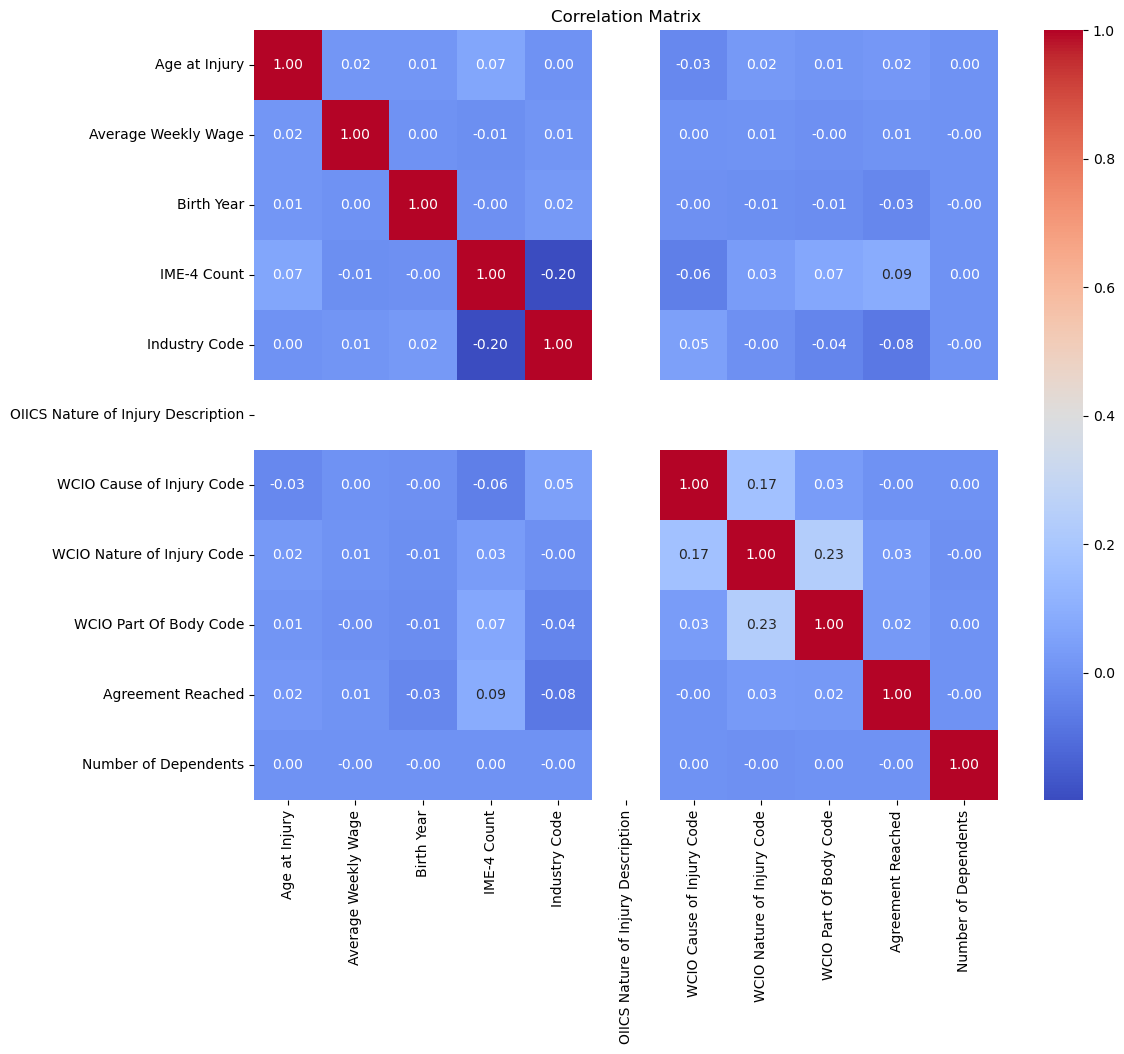

In [23]:
# Filter the dataframe to include only integer and float columns
numeric_train_data = train_data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numeric_train_data.corr()

# Plot the correlation matrix using matplotlib
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

As this heatmap shows, theres not much to say about the correlations between features

#### Outliers

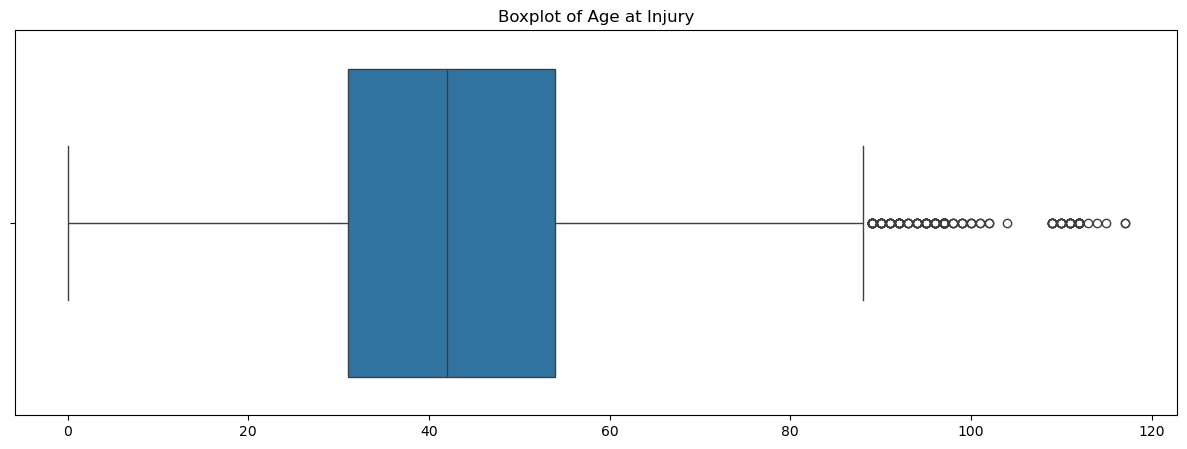

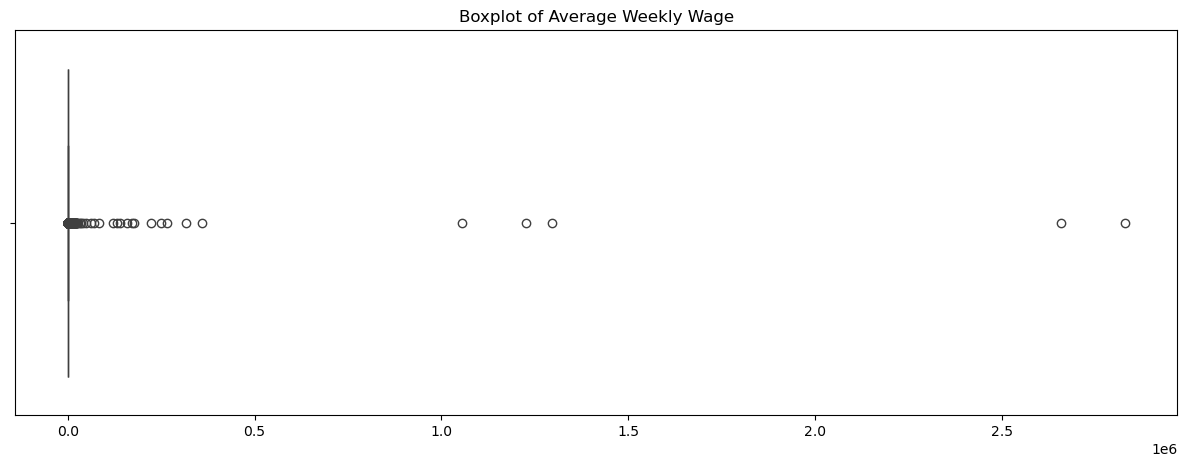

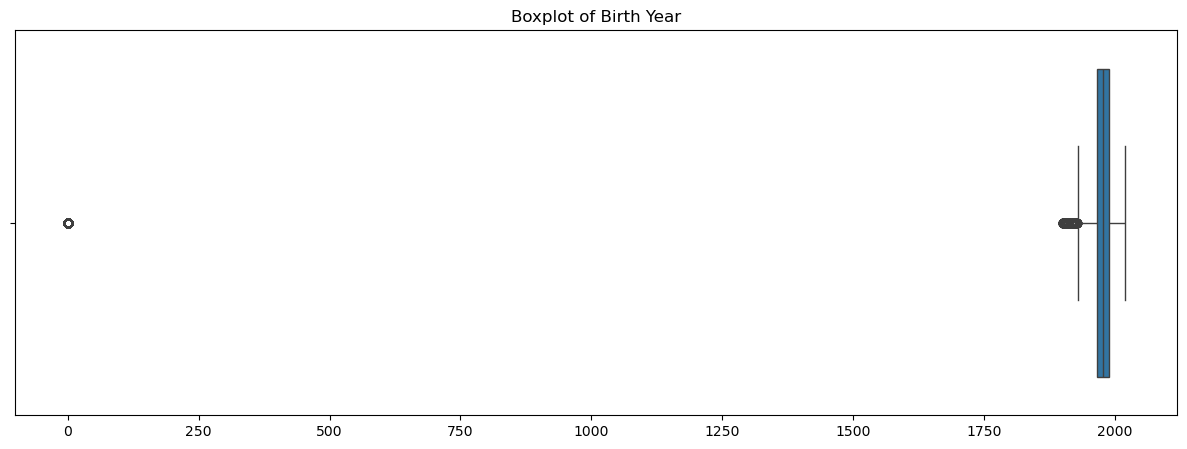

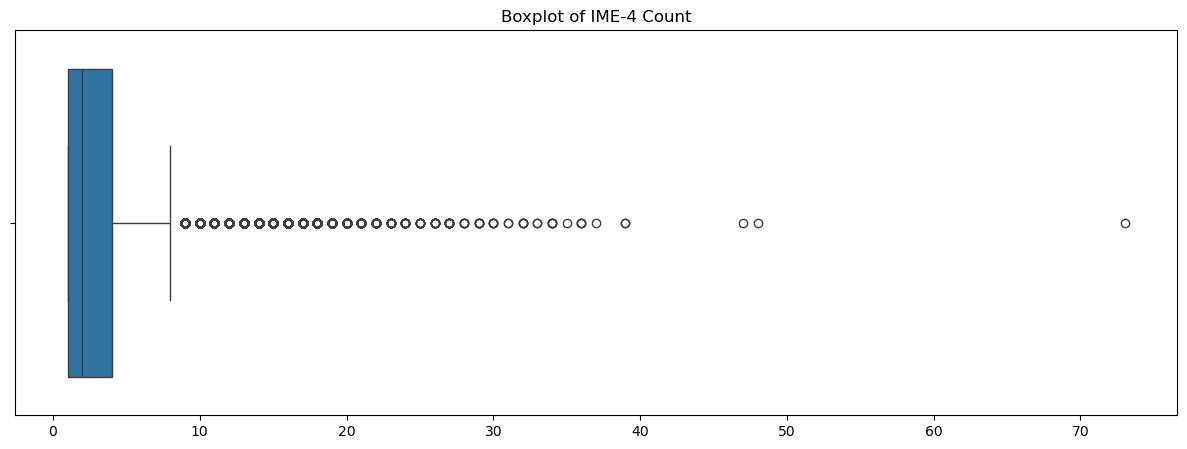

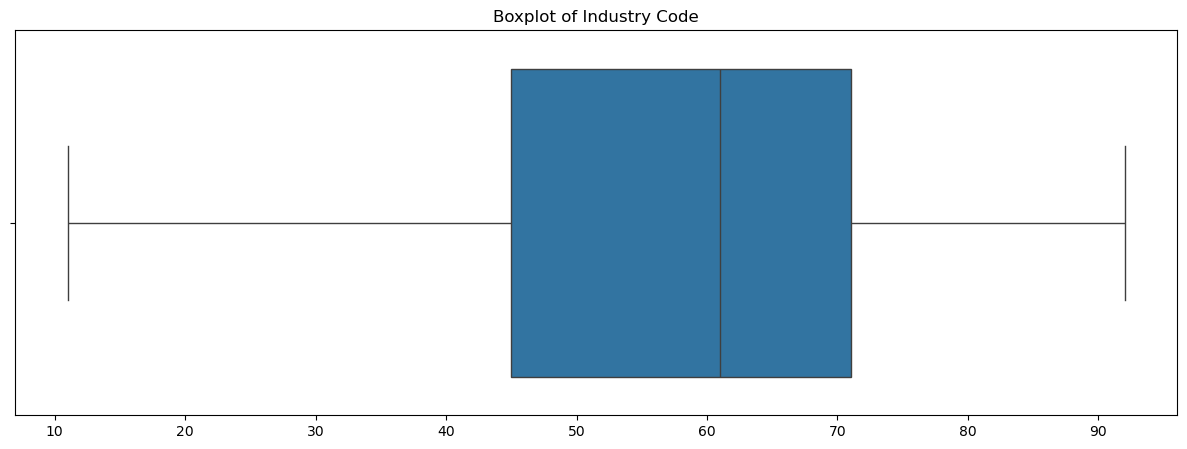

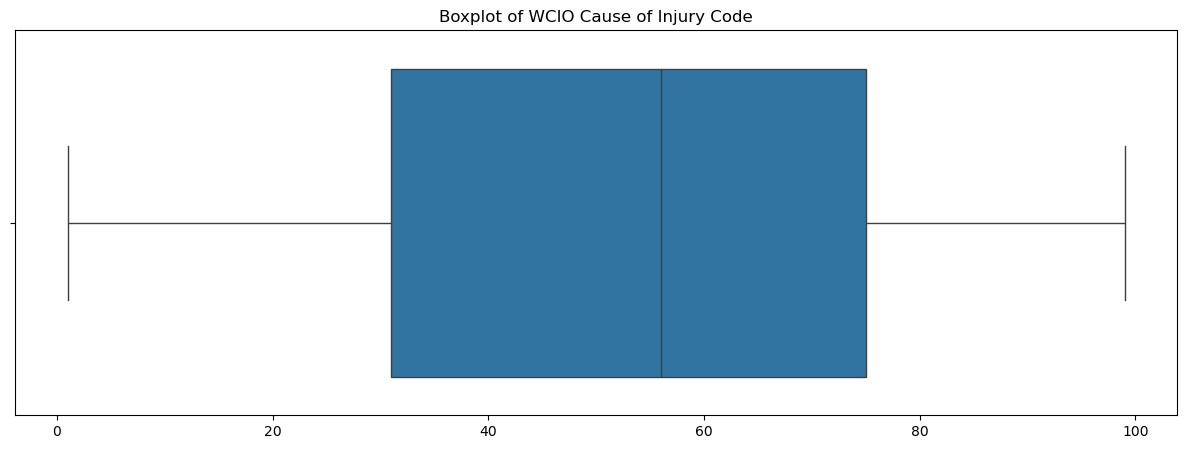

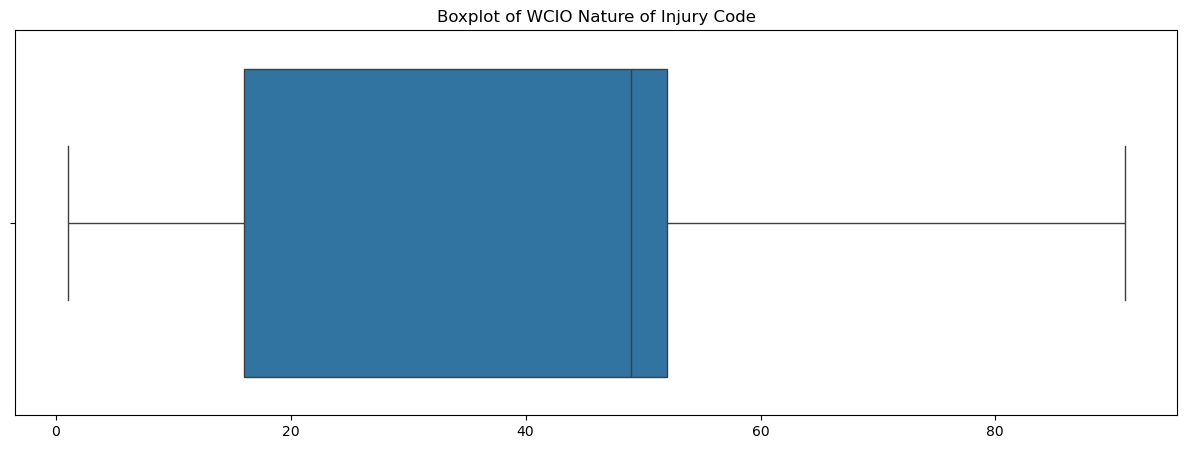

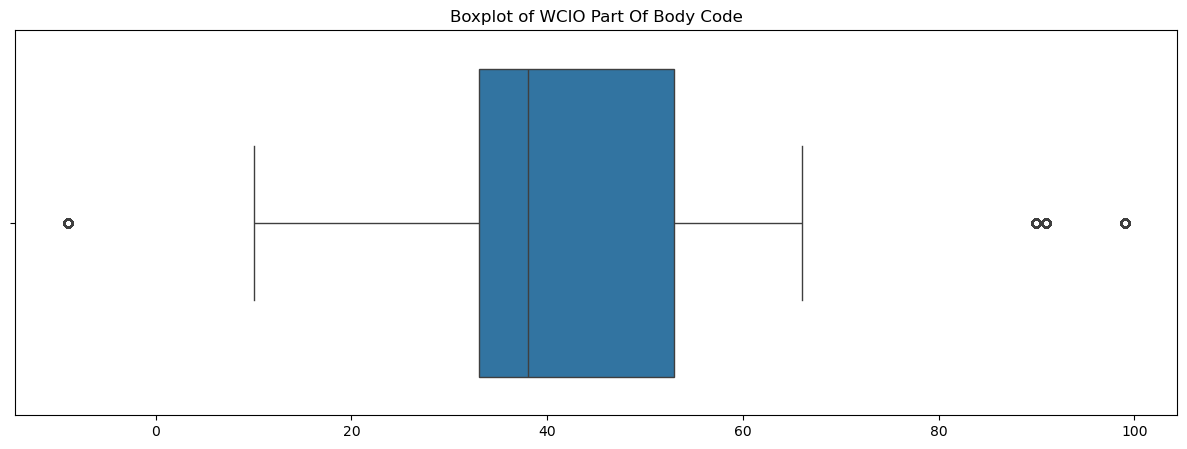

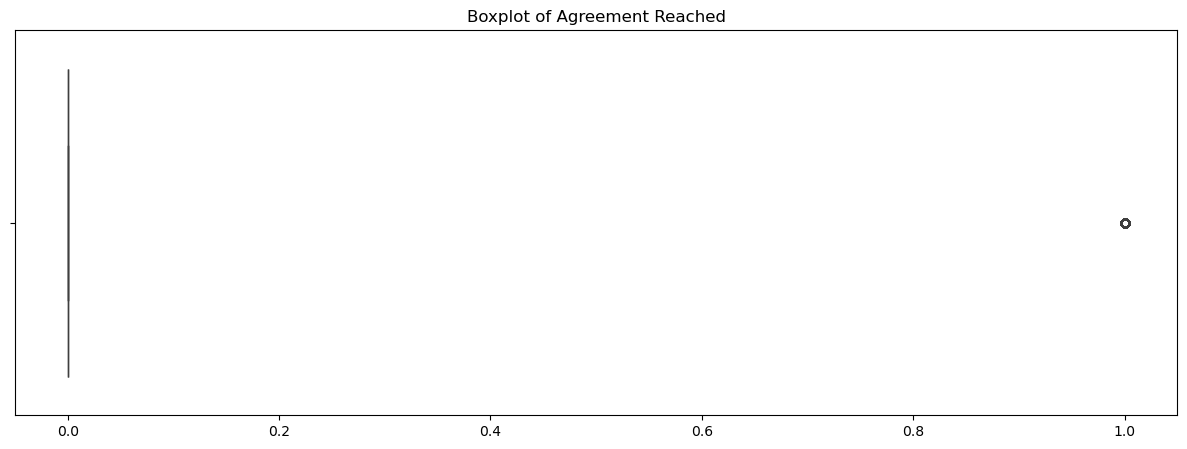

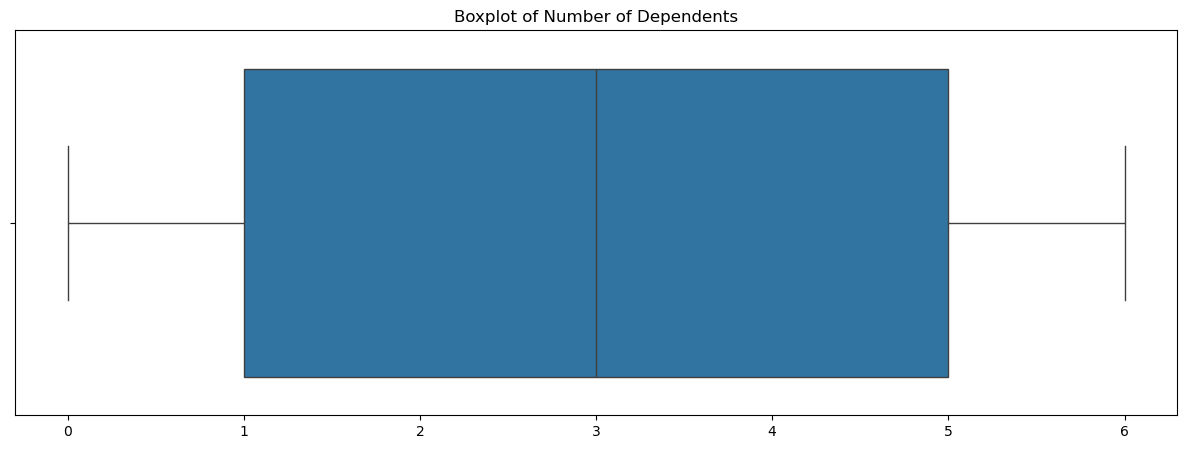

In [24]:
# Remove columns with all NaN values
numeric_train_data = numeric_train_data.dropna(axis=1, how='all')

# Plot each numerical feature in a separate plot
for column in numeric_train_data.columns:
    plt.figure(figsize=(15, 5))
    sns.boxplot(data=numeric_train_data, x=column)
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')
    plt.show()


### 2.1.5 Numerical Features - univariate analysis

In [25]:
# numerical features only
num_feat = list(df.select_dtypes(include='number').columns)
print(num_feat)

# remove categorical variable with code
num_feat = [col for col in num_feat if 'Code' not in col]
num_feat = [col for col in num_feat if 'Description' not in col]
num_feat

['Age at Injury', 'Average Weekly Wage', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents']


['Age at Injury', 'Average Weekly Wage', 'IME-4 Count', 'Number of Dependents']

#### Age at Injury

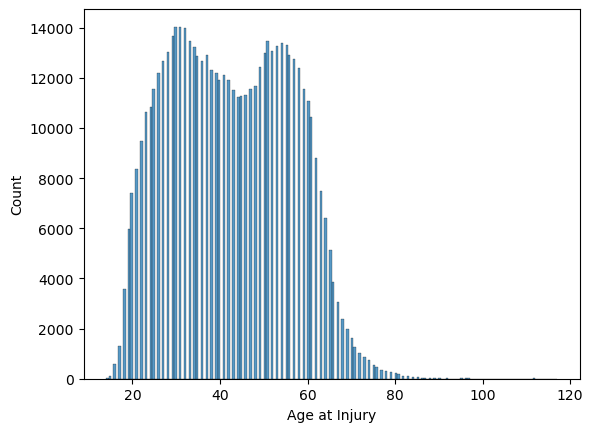

<Axes: ylabel='Age at Injury'>

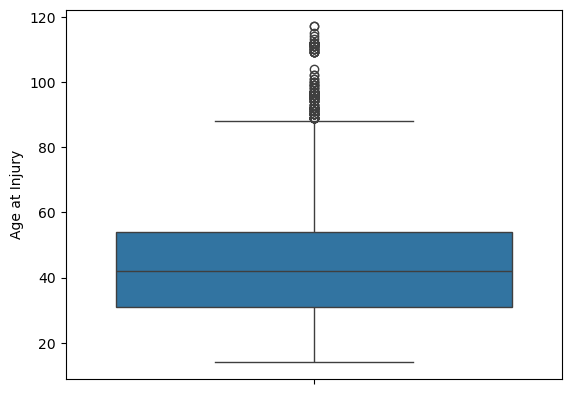

In [26]:
#14 is the minimum age to work in New York
sns.histplot(df[df['Age at Injury'] > 13]['Age at Injury'],)
plt.show()

sns.boxplot(df[df['Age at Injury'] > 13]['Age at Injury'])

#### Average Weekly Wage

We can see that this feature has a lot of outliers that need to be treated further in the project

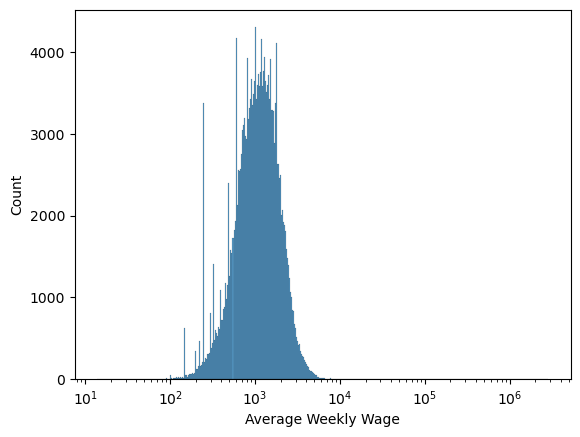

<Axes: ylabel='Average Weekly Wage'>

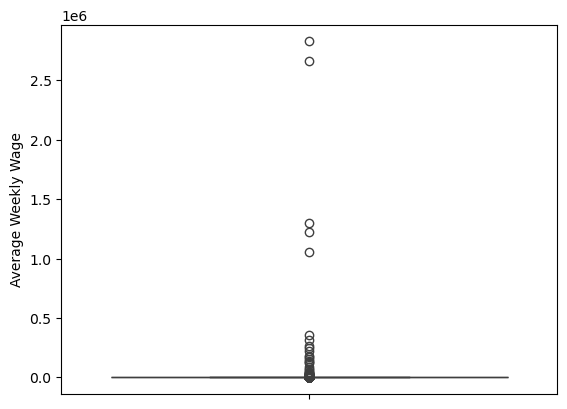

In [27]:
sns.histplot(df['Average Weekly Wage'], log_scale=True)
plt.show()

sns.boxplot(df['Average Weekly Wage'])

Here we can see that the values for Average Weekly Wage seem fine but due to the large amount of zeros, the auto attributed values for the will not work here

In [28]:
print(df['Average Weekly Wage'].describe())

count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64


#### Number of Dependents

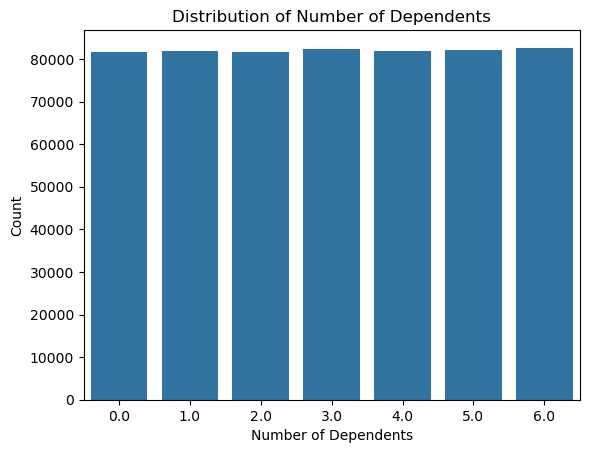

<Axes: ylabel='Number of Dependents'>

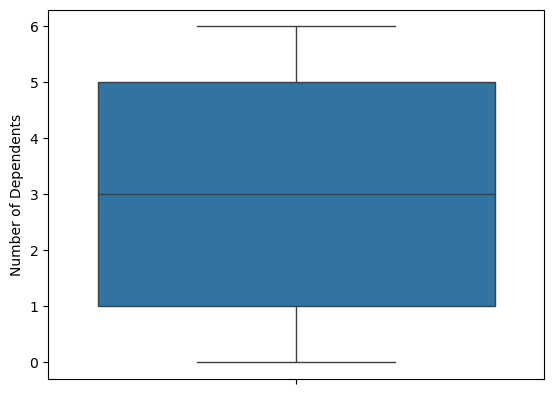

In [29]:
sns.countplot(x='Number of Dependents', data=df)
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.title('Distribution of Number of Dependents')
plt.show()

sns.boxplot(df['Number of Dependents'])

#### IME-4 Count

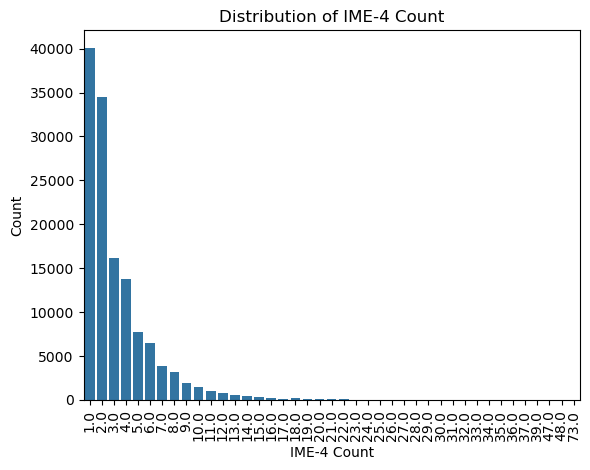

<Axes: ylabel='IME-4 Count'>

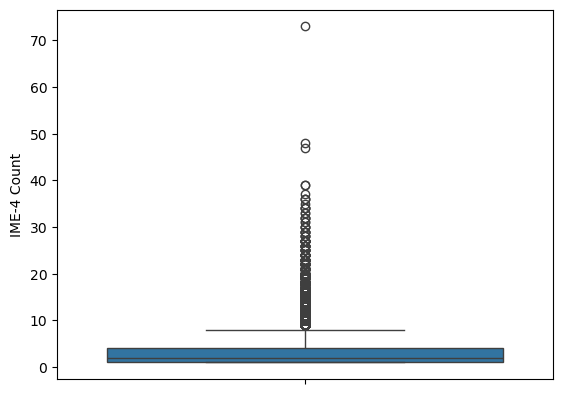

In [30]:
'IME-4 Count'

sns.countplot(x='IME-4 Count', data=df)
plt.xlabel('IME-4 Count')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.title('Distribution of IME-4 Count')
plt.show()

sns.boxplot(df['IME-4 Count'])

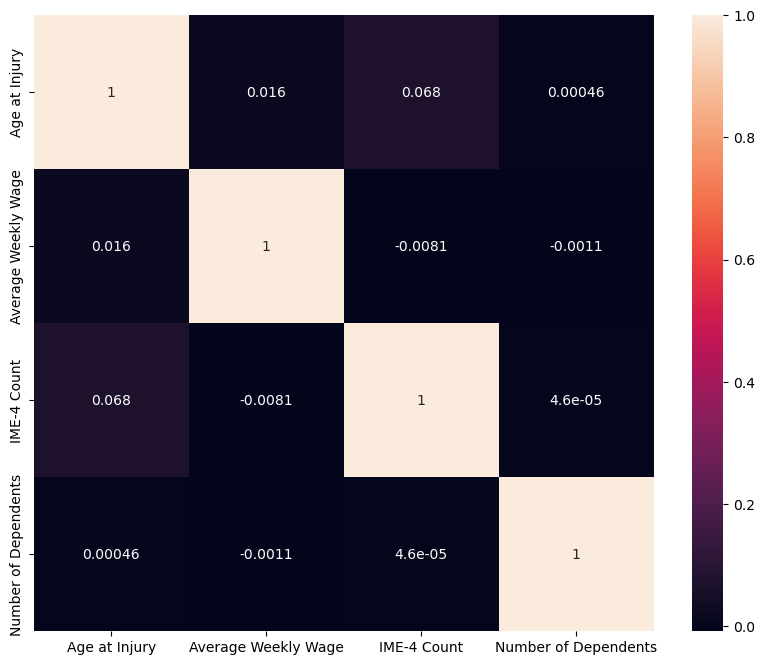

In [31]:
fig = plt.figure(figsize=(10, 8))


corr = df[num_feat].corr(method="pearson")


sns.heatmap(data=corr, annot=True, )


plt.show()

---

### 2.1.6 Categorical Features- Univariate Analysis

In [32]:
# select categorical features
df_cat = df.select_dtypes(include='object').columns.tolist()

# add columns that contain 'Code' or 'Description' in their name
df_cat += [col for col in df.columns if 'Code' in col or 'Description' in col]

# remove any duplicates (in case a column is already in both categories)
df_cat = list(set(df_cat))

df_cat

['Carrier Type',
 'WCIO Nature of Injury Description',
 'Gender',
 'WCIO Cause of Injury Description',
 'WCIO Nature of Injury Code',
 'District Name',
 'Zip Code',
 'WCIO Cause of Injury Code',
 'Industry Code',
 'Industry Code Description',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'Carrier Name',
 'County of Injury',
 'WCB Decision',
 'WCIO Part Of Body Description',
 'Alternative Dispute Resolution',
 'WCIO Part Of Body Code',
 'Medical Fee Region']

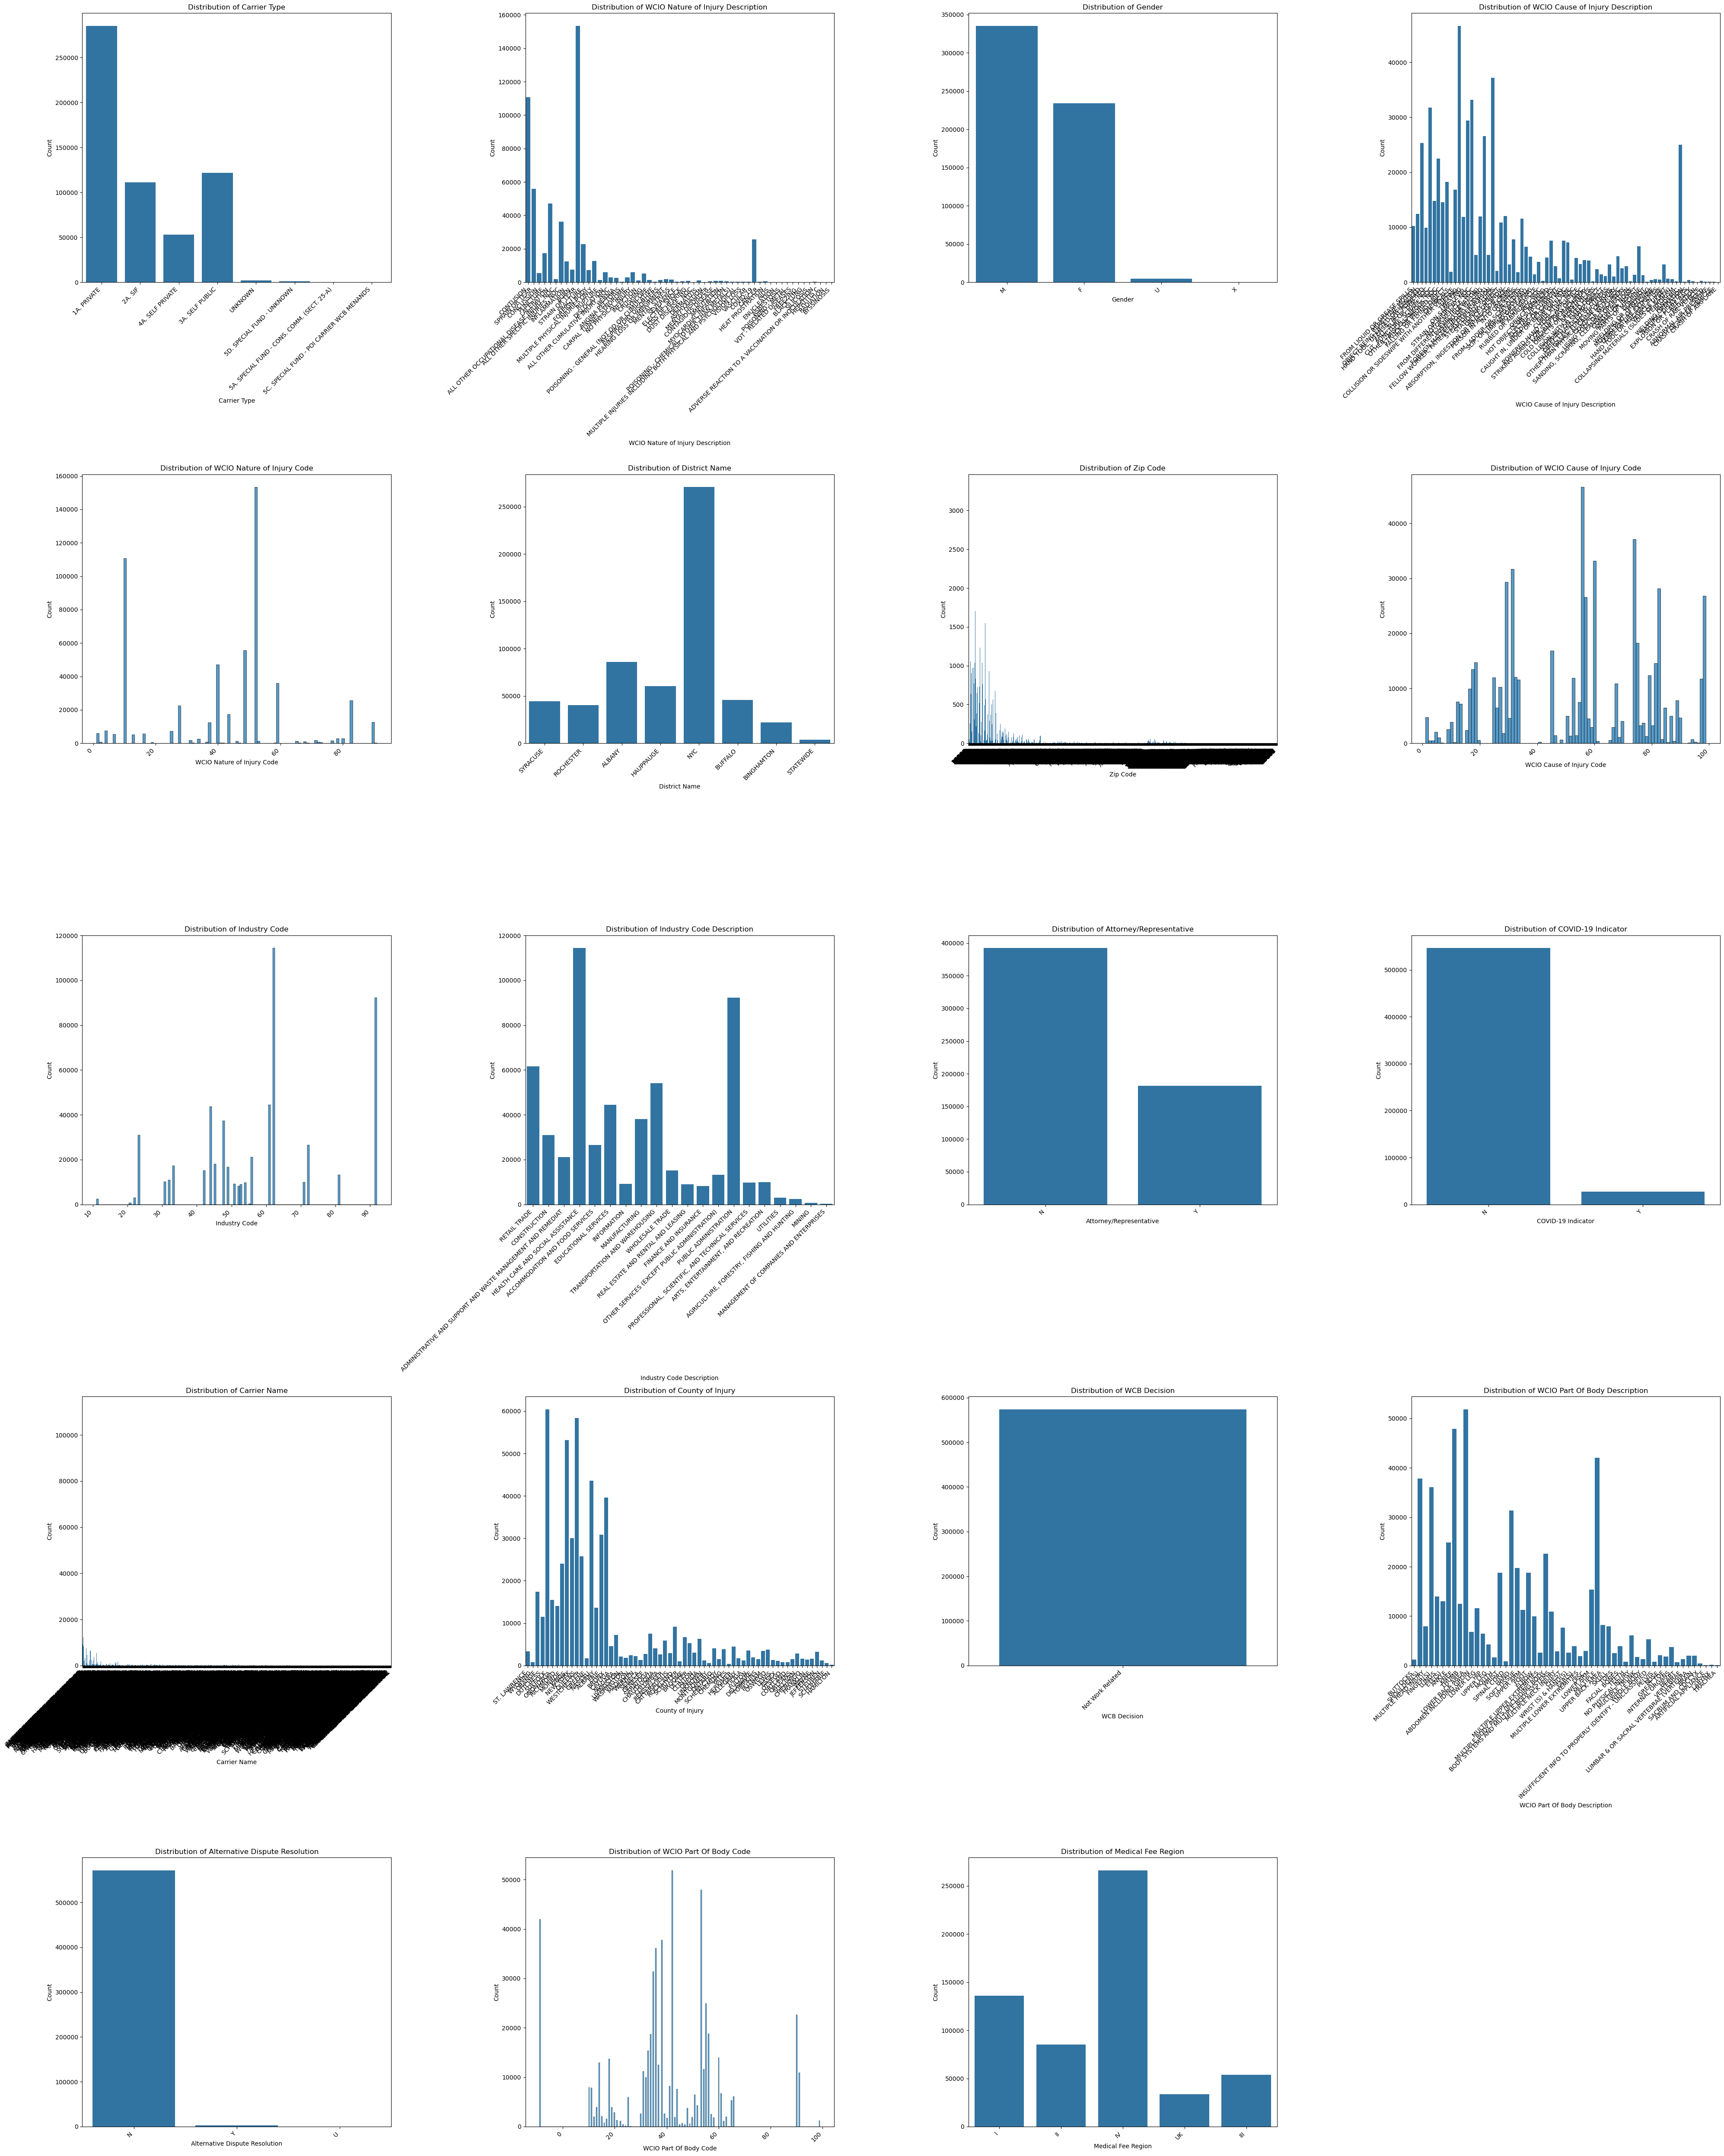

In [33]:
num_vars = len(df_cat)
num_cols = 4
num_rows = (num_vars // num_cols) + (num_vars % num_cols > 0)

plt.figure(figsize=(40, num_rows * 10))
for idx, var in enumerate(df_cat):
    plt.subplot(num_rows, num_cols, idx + 1)
    if train_data[var].dtype == 'object':
        sns.countplot(x=var, data=train_data)
    else:
        sns.histplot(train_data[var], kde=False)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Assembly Date

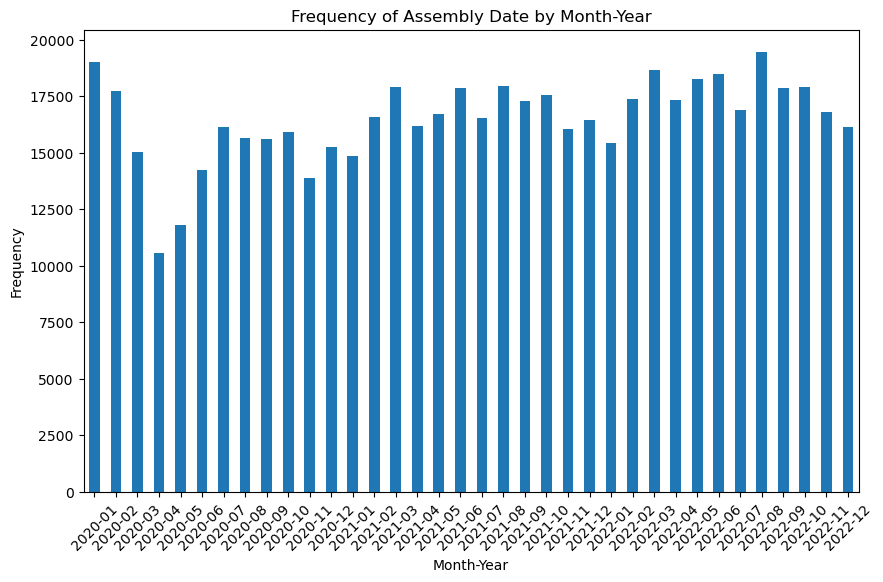

In [34]:
dfc = df.copy()
dfc['Assembly Date'] = pd.to_datetime(dfc['Assembly Date'])  
dfc['year_month'] = dfc['Assembly Date'].dt.to_period('M')  

dfc['year_month'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.title('Frequency of Assembly Date by Month-Year')
plt.xticks(rotation=45)
plt.show()


#### Accident Date

In [35]:
dfc = df.copy()
dfc['Accident Date'] = pd.to_datetime(dfc['Accident Date'])  

dfc = dfc[dfc['Accident Date'] >= '1961-01-01']

dfc['year'] = dfc['Accident Date'].dt.year
print(dfc['Accident Date'].min(), dfc['Accident Date'].max())

1961-09-06 00:00:00 2023-09-29 00:00:00


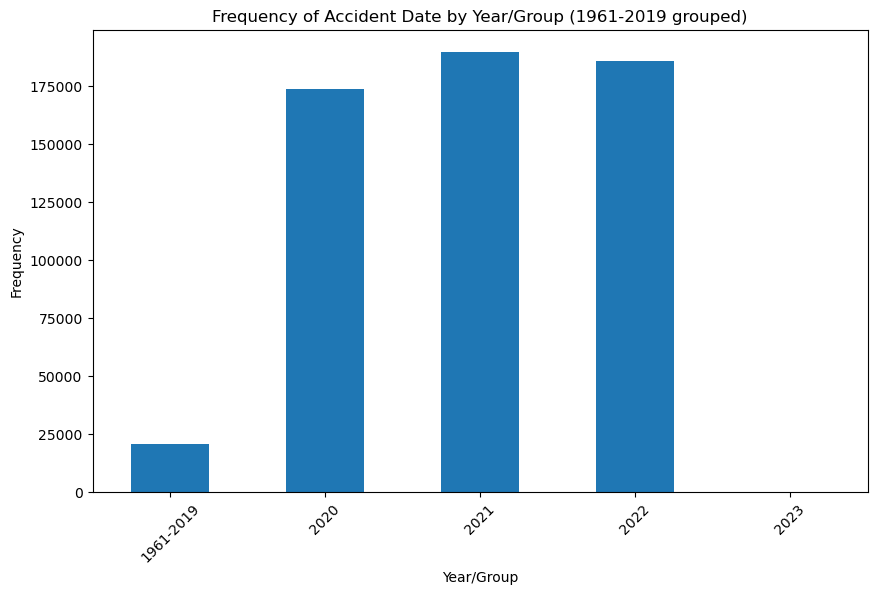

In [36]:
# consider only dates from 1961 onwards (because of the min value on the cell above)
dfc = dfc[dfc['Accident Date'] >= '1961-01-01']

# create a group for the first 59 year due to the low frequency
dfc['year_group'] = dfc['year'].apply(lambda x: '1961-2019' if x <= 2019 else str(x))

# count the frequency of the accident date by year
yearly_grouped_counts = dfc['year_group'].value_counts().sort_index()

# plot the frequency of the accident date by year
yearly_grouped_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year/Group')
plt.ylabel('Frequency')
plt.title('Frequency of Accident Date by Year/Group (1961-2019 grouped)')
plt.xticks(rotation=45)
plt.show()

#### C-2 and C-3 Date

In [37]:
dfc = df.copy()
dfc['C-2 Date'] = pd.to_datetime(dfc['C-2 Date'])  


dfc['year'] = dfc['C-2 Date'].dt.year
print(dfc['C-2 Date'].min(), dfc['C-2 Date'].max())

1996-01-12 00:00:00 2024-06-01 00:00:00


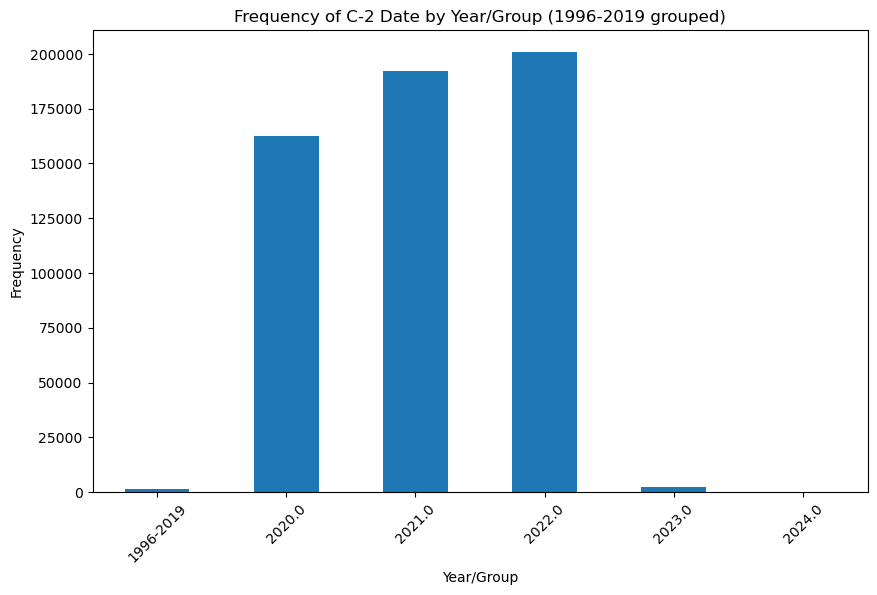

In [38]:
# consider only dates from 1996 onwards (because of the min value on the cell above)
dfc = dfc[dfc['C-2 Date'] >= '1996-01-1']

# create a group for the first 2ish decades due to the low frequency
dfc['year_group'] = dfc['year'].apply(lambda x: '1996-2019' if x <= 2019 else str(x))

# count the frequency of the accident date by year
yearly_grouped_counts = dfc['year_group'].value_counts().sort_index()

# plot the frequency of the accident date by year
yearly_grouped_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year/Group')
plt.ylabel('Frequency')
plt.title('Frequency of C-2 Date by Year/Group (1996-2019 grouped)')
plt.xticks(rotation=45)
plt.show()

In [39]:
dfc = df.copy()

# Convert 'C-2 Date' and 'C-3 Date' to datetime
dfc['C-2 Date'] = pd.to_datetime(dfc['C-2 Date'])
dfc['C-3 Date'] = pd.to_datetime(dfc['C-3 Date'])

print(dfc['C-2 Date'].min(), dfc['C-2 Date'].max())
print(dfc['C-3 Date'].min(), dfc['C-3 Date'].max())


1996-01-12 00:00:00 2024-06-01 00:00:00
1992-11-13 00:00:00 2024-05-31 00:00:00


In [40]:
# consider only dates from 1996 onwards (because of the min value on the cell above) for C-2
dfc_c2 = dfc[dfc['C-2 Date'] >= '1996-01-01']
dfc_c2['year_c2'] = dfc_c2['C-2 Date'].dt.year

# consider only dates from 1992 onwards (because of the min value on the cell above) for C-3
dfc_c3 = dfc[dfc['C-3 Date'] >= '1992-01-01']
dfc_c3['year_c3'] = dfc_c3['C-3 Date'].dt.year


# group from the min year to 2019 and then by year due to the low frequency
dfc_c2['year_group_c2'] = dfc_c2['year_c2'].apply(lambda x: '1996-2019' if x <= 2019 else str(x))
dfc_c3['year_group_c3'] = dfc_c3['year_c3'].apply(lambda x: '1992-2019' if x <= 2019 else str(x))

# Calculate the frequency of the accident date by year group
yearly_grouped_counts_c2 = dfc_c2['year_group_c2'].value_counts().sort_index()
yearly_grouped_counts_c3 = dfc_c3['year_group_c3'].value_counts().sort_index()

C:\Users\inesm\AppData\Local\Temp\ipykernel_10096\4135501934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_c2['year_c2'] = dfc_c2['C-2 Date'].dt.year
C:\Users\inesm\AppData\Local\Temp\ipykernel_10096\4135501934.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc_c3['year_c3'] = dfc_c3['C-3 Date'].dt.year
C:\Users\inesm\AppData\Local\Temp\ipykernel_10096\4135501934.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

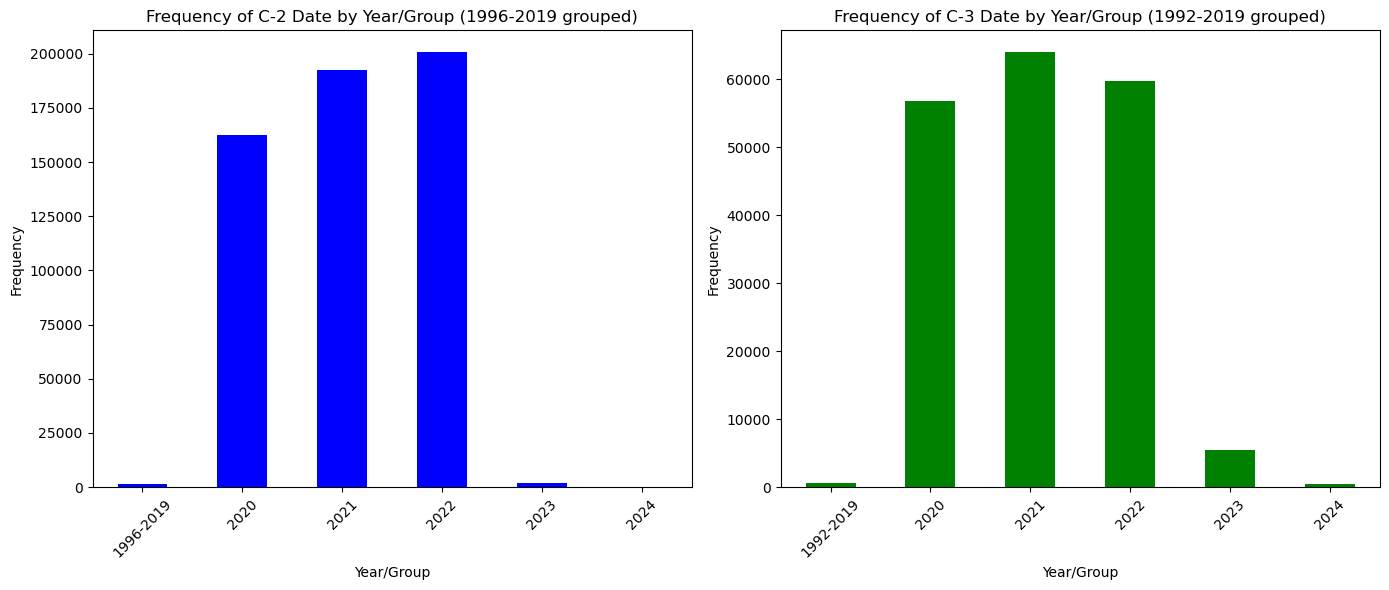

In [41]:
# Plot both graphs side by side using subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# plot for C-2 Date
yearly_grouped_counts_c2.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_xlabel('Year/Group')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Frequency of C-2 Date by Year/Group (1996-2019 grouped)')
axes[0].tick_params(axis='x', rotation=45)

# plot for C-3 Date
yearly_grouped_counts_c3.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_xlabel('Year/Group')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Frequency of C-3 Date by Year/Group (1992-2019 grouped)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### First Hearing Date

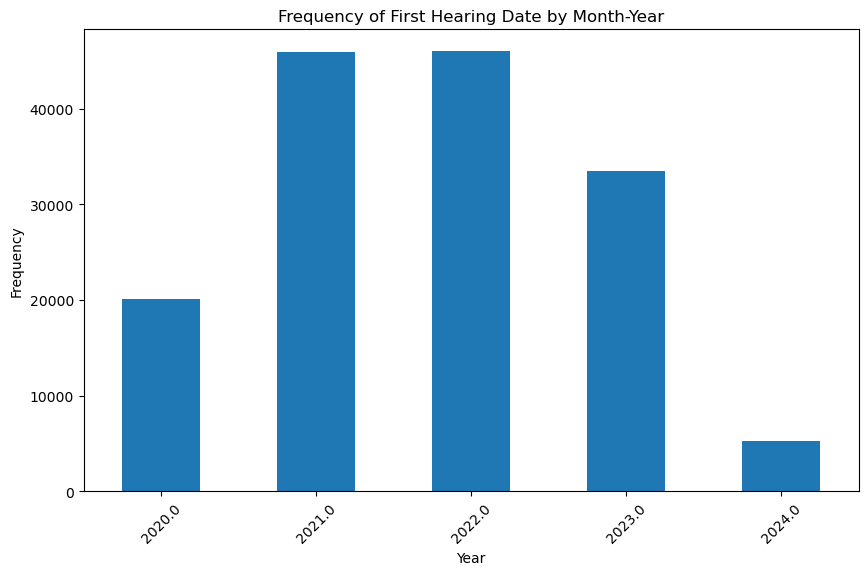

In [42]:
dfc = df.copy()
dfc['First Hearing Date'] = pd.to_datetime(dfc['First Hearing Date'])  
dfc['year'] = dfc['First Hearing Date'].dt.year

dfc['year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Frequency of First Hearing Date by Month-Year')
plt.xticks(rotation=45)
plt.show()

#### WCB Decision
Oh no, this categorical feature only has one value

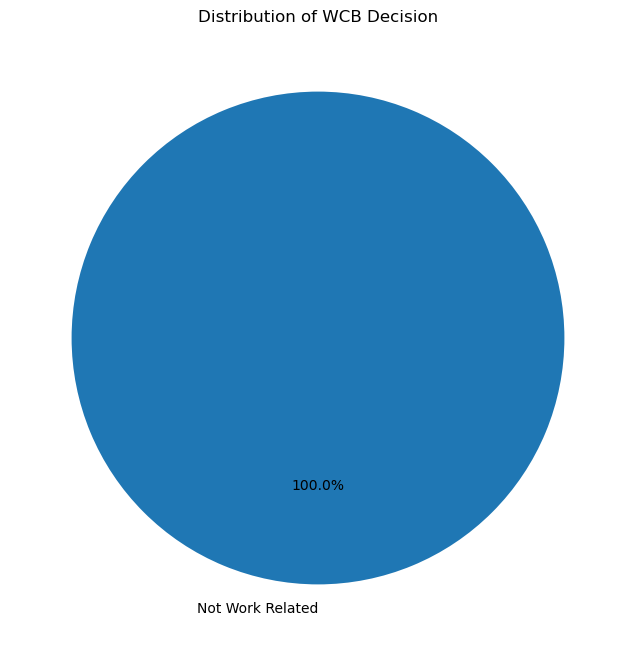

In [43]:
wcb_decision_counts = df['WCB Decision'].value_counts()

plt.figure(figsize=(8, 8))
wcb_decision_counts.plot.pie(autopct='%1.1f%%', startangle=90,)
plt.ylabel('')
plt.title('Distribution of WCB Decision')
plt.show()

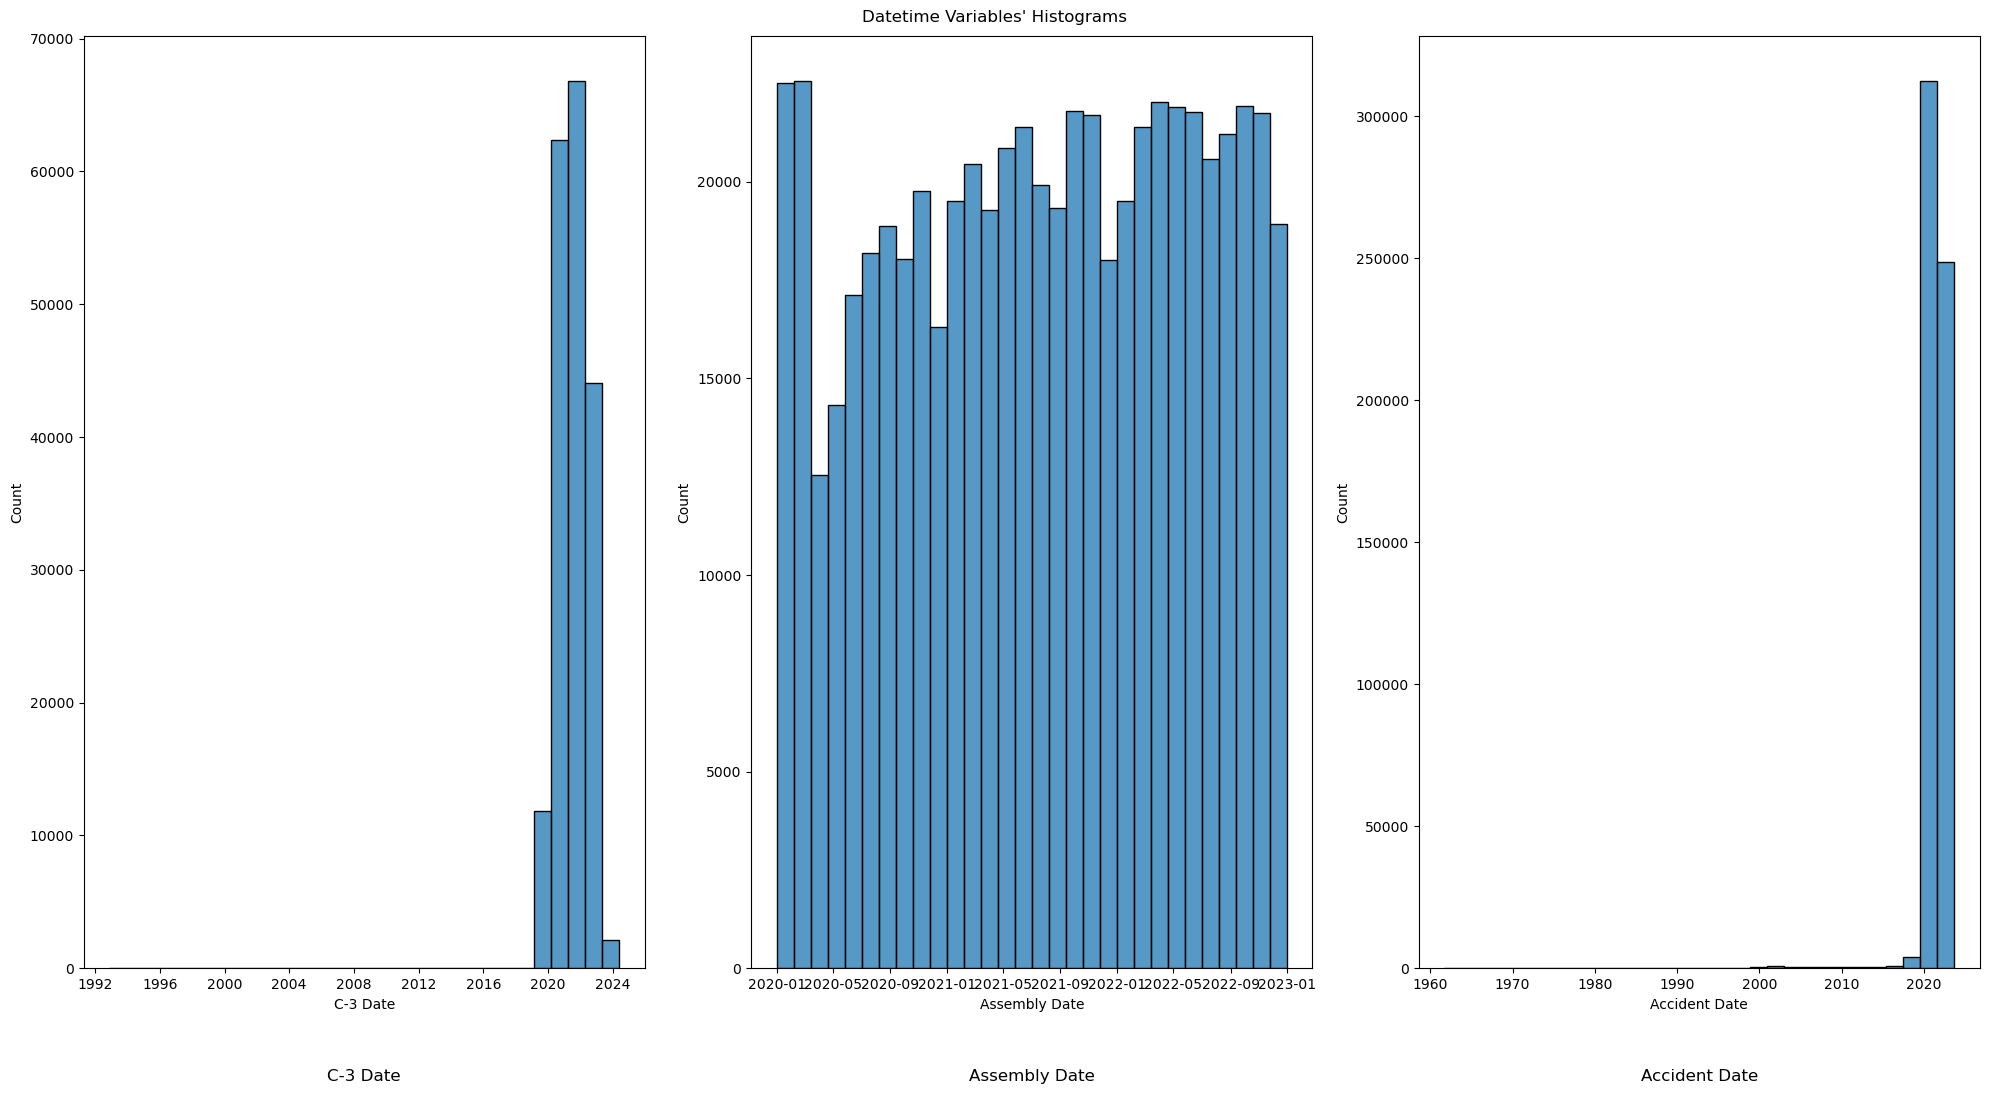

In [44]:
features = ['C-3 Date', 'Assembly Date', 'Accident Date']

# Set up the figure with the specified number of rows and columns
sp_rows = 1
sp_cols = 3

fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 11), tight_layout=True)

# Plot data
for ax, feat in zip(axes.flatten(), features):
    sns.histplot(df[feat], ax=ax, bins=30)
    ax.set_title(feat, y=-0.13)

title = "Datetime Variables' Histograms"

plt.suptitle(title)
plt.show()

#### Fix Birthday Year Nan


In [45]:
df.isna().sum()

Accident Date                         23134
Age at Injury                         19445
Alternative Dispute Resolution        19445
Assembly Date                             0
Attorney/Representative               19445
Average Weekly Wage                   48096
Birth Year                            73604
C-2 Date                              34005
C-3 Date                             406226
Carrier Name                          19445
Carrier Type                          19445
County of Injury                      19445
COVID-19 Indicator                    19445
District Name                         19445
First Hearing Date                   442673
Gender                                19445
IME-4 Count                          460668
Industry Code                         29403
Industry Code Description             29403
Medical Fee Region                    19445
WCIO Cause of Injury Code             35085
WCIO Cause of Injury Description      35085
WCIO Nature of Injury Code      

In [46]:
if df['Birth Year'].isna().any():
    df['Birth Year'] = df['Accident Date'].dt.year - df['Age at Injury']

df['Birth Year'].isna().sum()

23134

---
# Multivariate Analysis
## Age at Injury vs. Average Weekly Wage


### 2.1.7 Multivariate Analysis

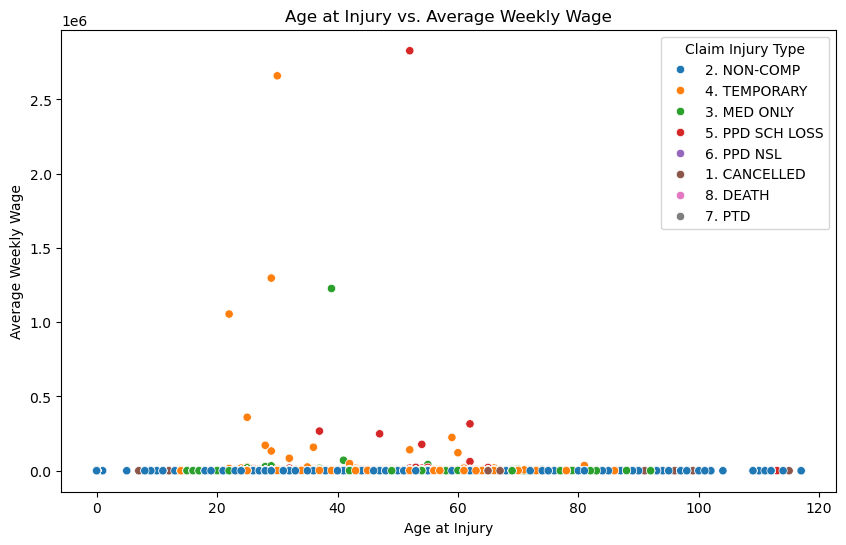

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age at Injury', y='Average Weekly Wage', hue='Claim Injury Type', data=train_data)
plt.title('Age at Injury vs. Average Weekly Wage')
plt.xlabel('Age at Injury')
plt.ylabel('Average Weekly Wage')
plt.show()

As we can see there's a lot a values of "Average Weekly Wage" equal to zero, we have to decide what to do wiith it

In [48]:
df[df['Average Weekly Wage']==0].shape[0]

335450

#### Average Weekly Wage by Claim Injury Type


C:\Users\inesm\AppData\Local\Temp\ipykernel_23808\3007533555.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Gender', y='Average Weekly Wage', data=train_data, estimator=np.mean, ci='sd', capsize=0.1)


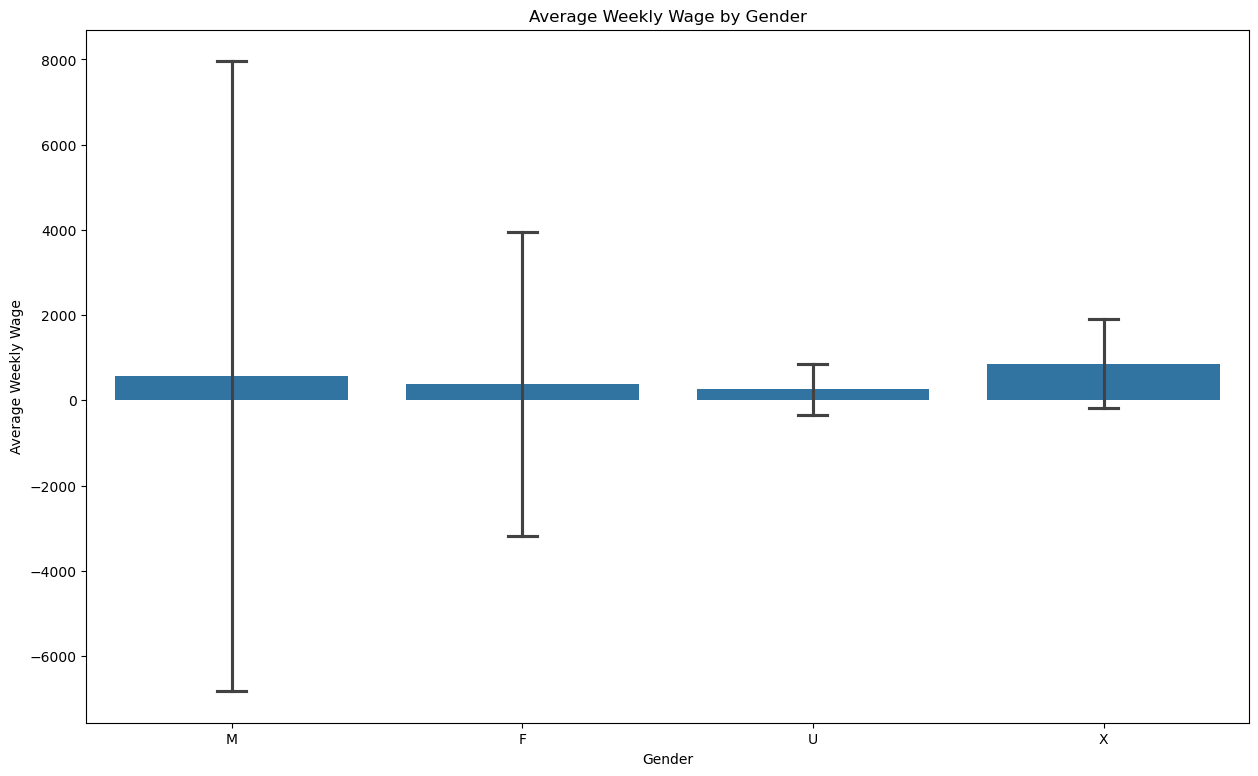

In [ ]:
# Average Weekly Wage by Gender
plt.figure(figsize=(15, 9))
sns.barplot(x='Gender', y='Average Weekly Wage', data=train_data, estimator=np.mean, ci='sd', capsize=0.1)
plt.title('Average Weekly Wage by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Weekly Wage')
plt.show()


Everything that has the feature "Average Weekly Wage" has to be taken "with a grain of salt" because of the amount of zeros

#### Age at Injury by Claim Injury Type

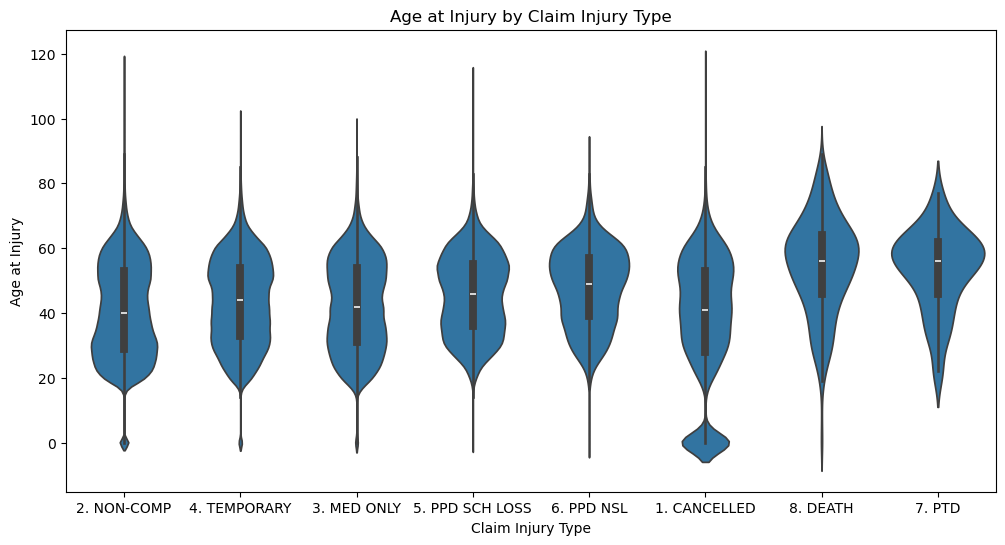

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Claim Injury Type', y='Age at Injury', data=train_data)
plt.title('Age at Injury by Claim Injury Type')
plt.show()

There is a significante amont of cancelled claims at a young age

#### Stacked Bar Plot for Gender vs. Claim Injury Type

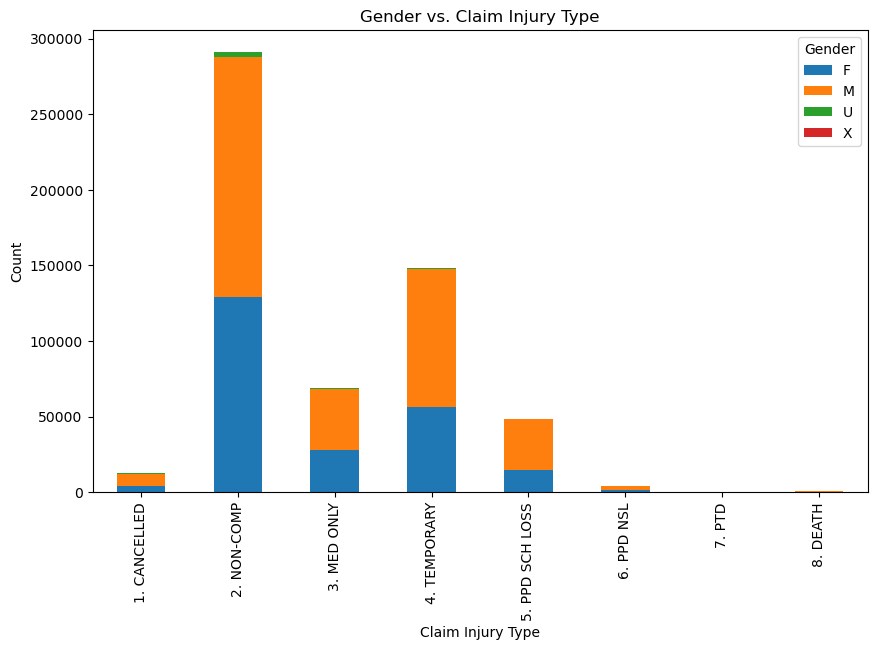

In [ ]:
pd.crosstab(train_data['Claim Injury Type'],train_data['Gender']).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender vs. Claim Injury Type')
plt.xlabel('Claim Injury Type')
plt.ylabel('Count')
plt.show()

There's only a significant difference in Female and Male in PPD SCH LOSS

#### Gender vs Attorney/Representative

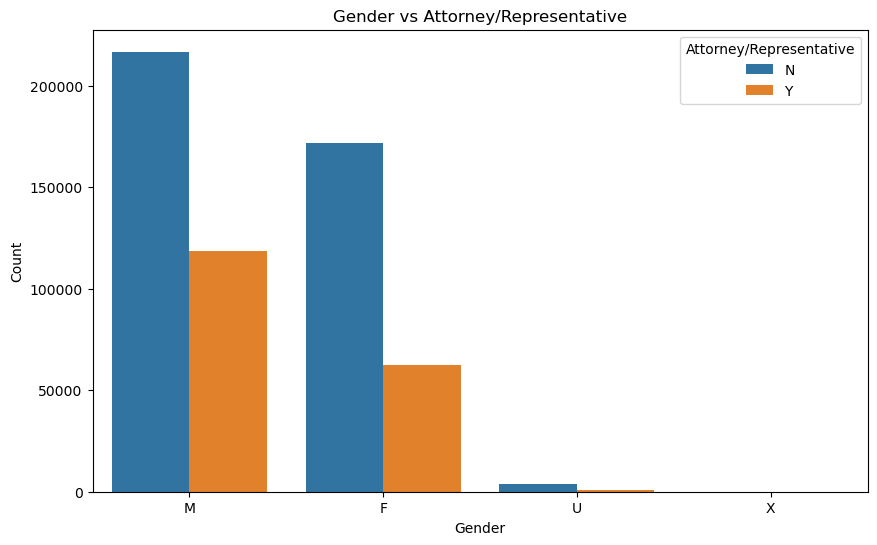

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Attorney/Representative', data=train_data)
plt.title('Gender vs Attorney/Representative')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attorney/Representative')
plt.show()


Observation: The proportion is almost the same compared with the amount of M/F/U/X so we cannot say there's descriminations towards a specific gender and the opportunity to have an attorney

#### WCIO Cause of Injury Code by Gender

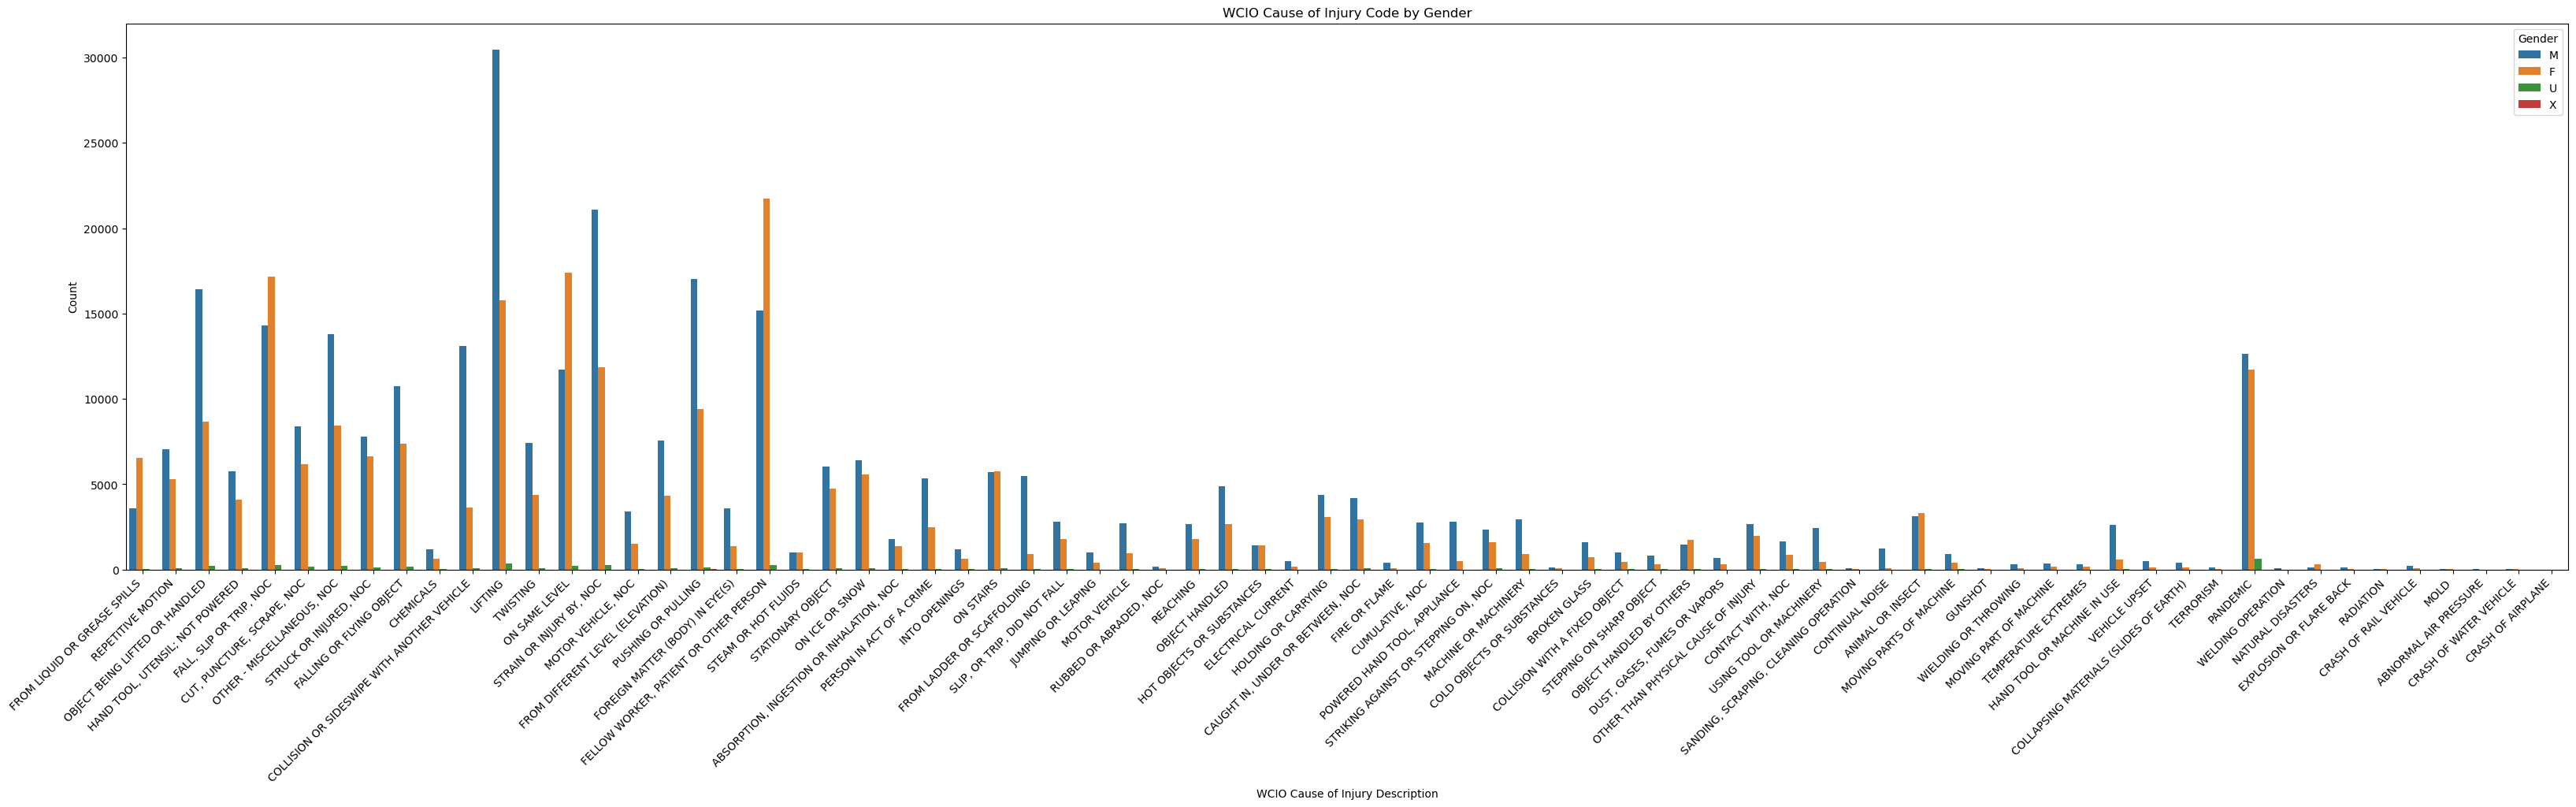

In [ ]:
# WCIO Cause of Injury Code by Gender
plt.figure(figsize=(40, 9))
sns.countplot(x='WCIO Cause of Injury Description', hue='Gender', data=train_data)
plt.title('WCIO Cause of Injury Code by Gender')
plt.xlabel('WCIO Cause of Injury Description')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45, ha='right')
plt.show()

#### WCIO Part Of Body Description by Claim Injury Type


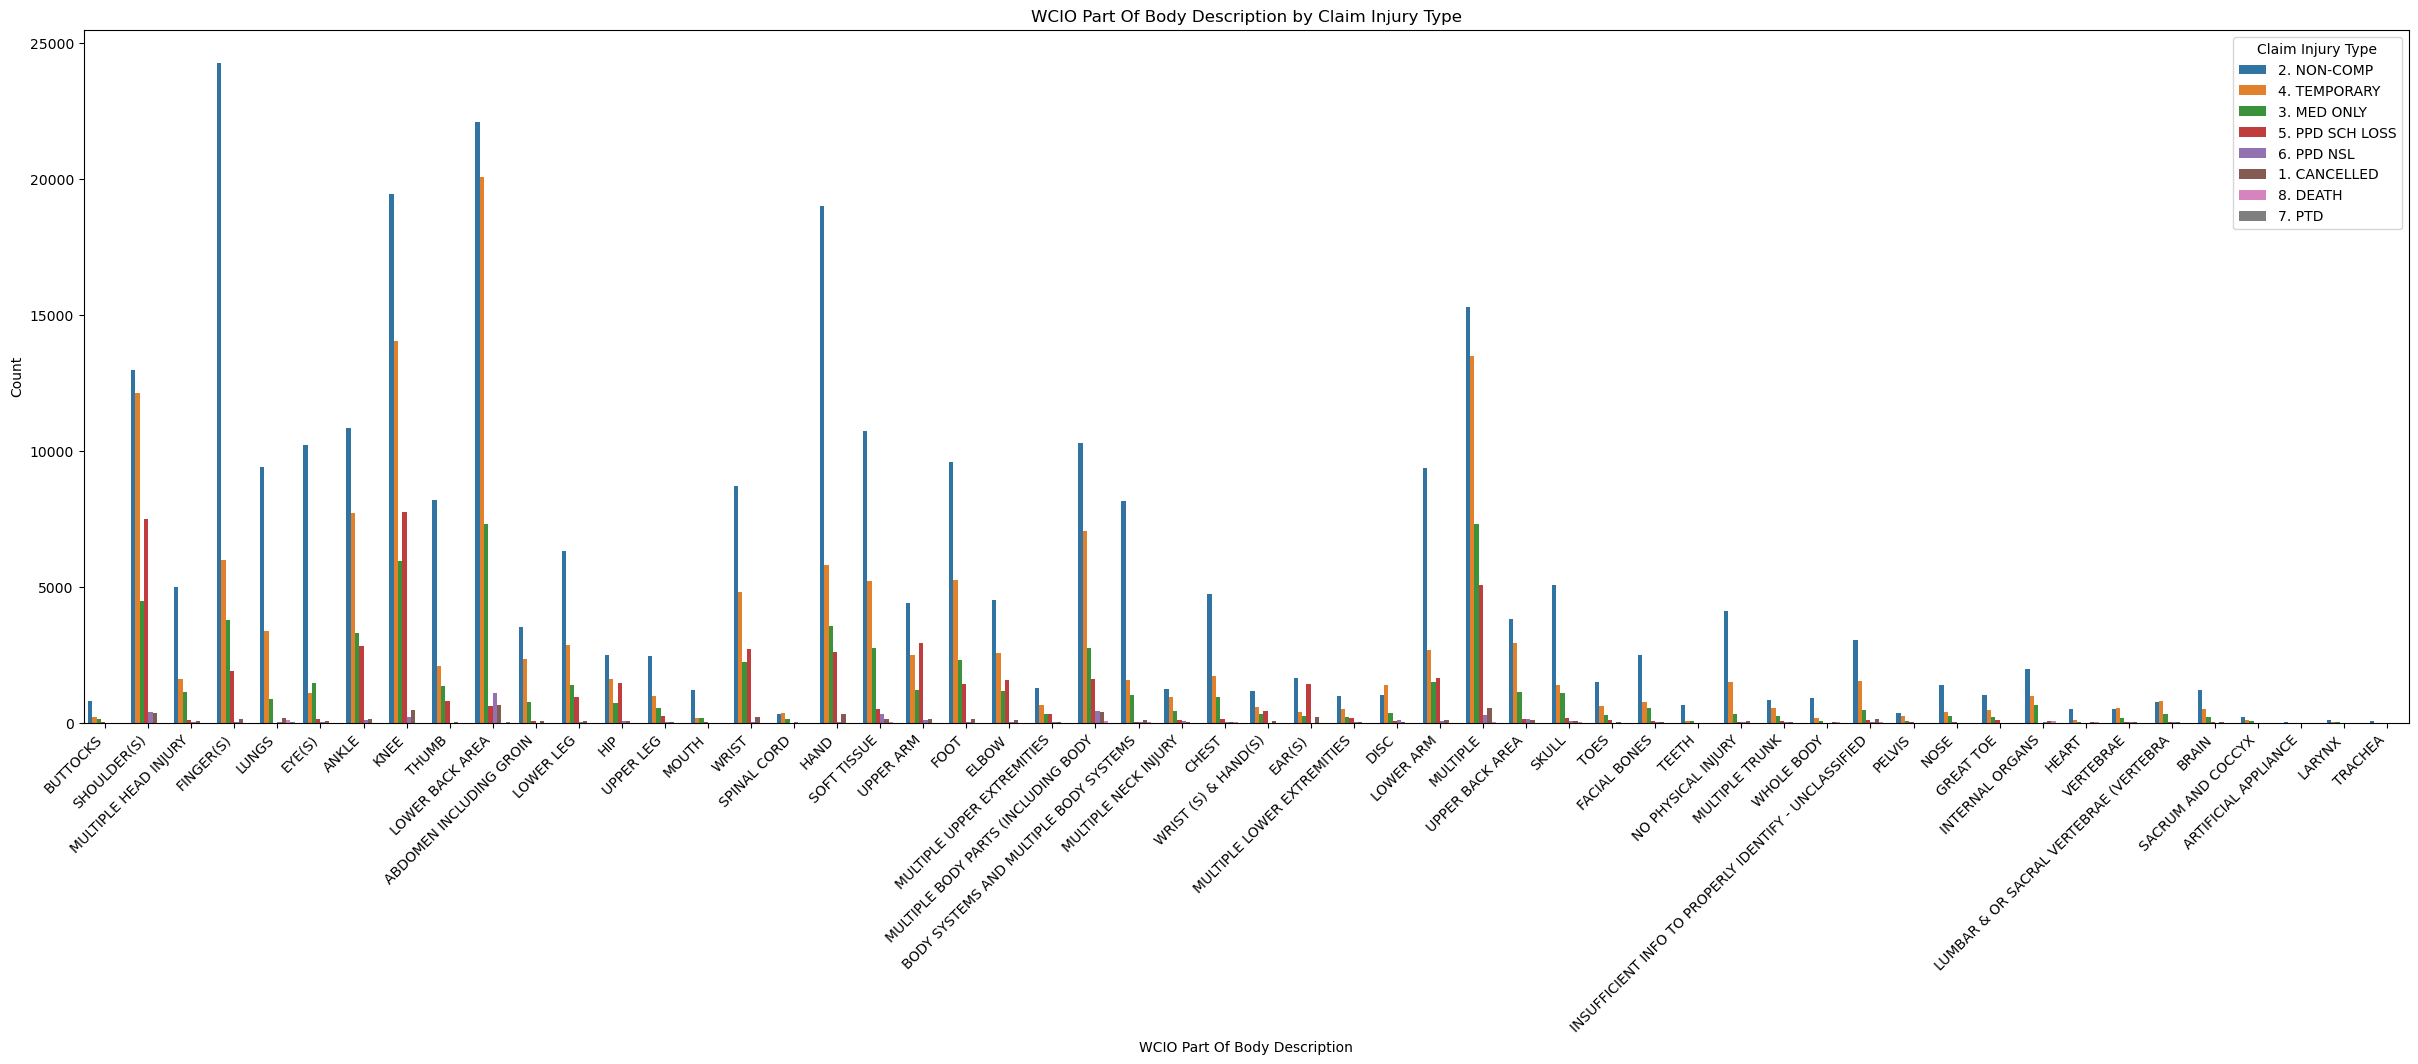

In [ ]:
# WCIO Part Of Body Code by Claim Injury Type
plt.figure(figsize=(30, 9))
sns.countplot(x='WCIO Part Of Body Description', hue='Claim Injury Type', data=train_data)
plt.title('WCIO Part Of Body Description by Claim Injury Type')
plt.xlabel('WCIO Part Of Body Description')
plt.ylabel('Count')
plt.legend(title='Claim Injury Type')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Carrier Type by Claim Injury Type

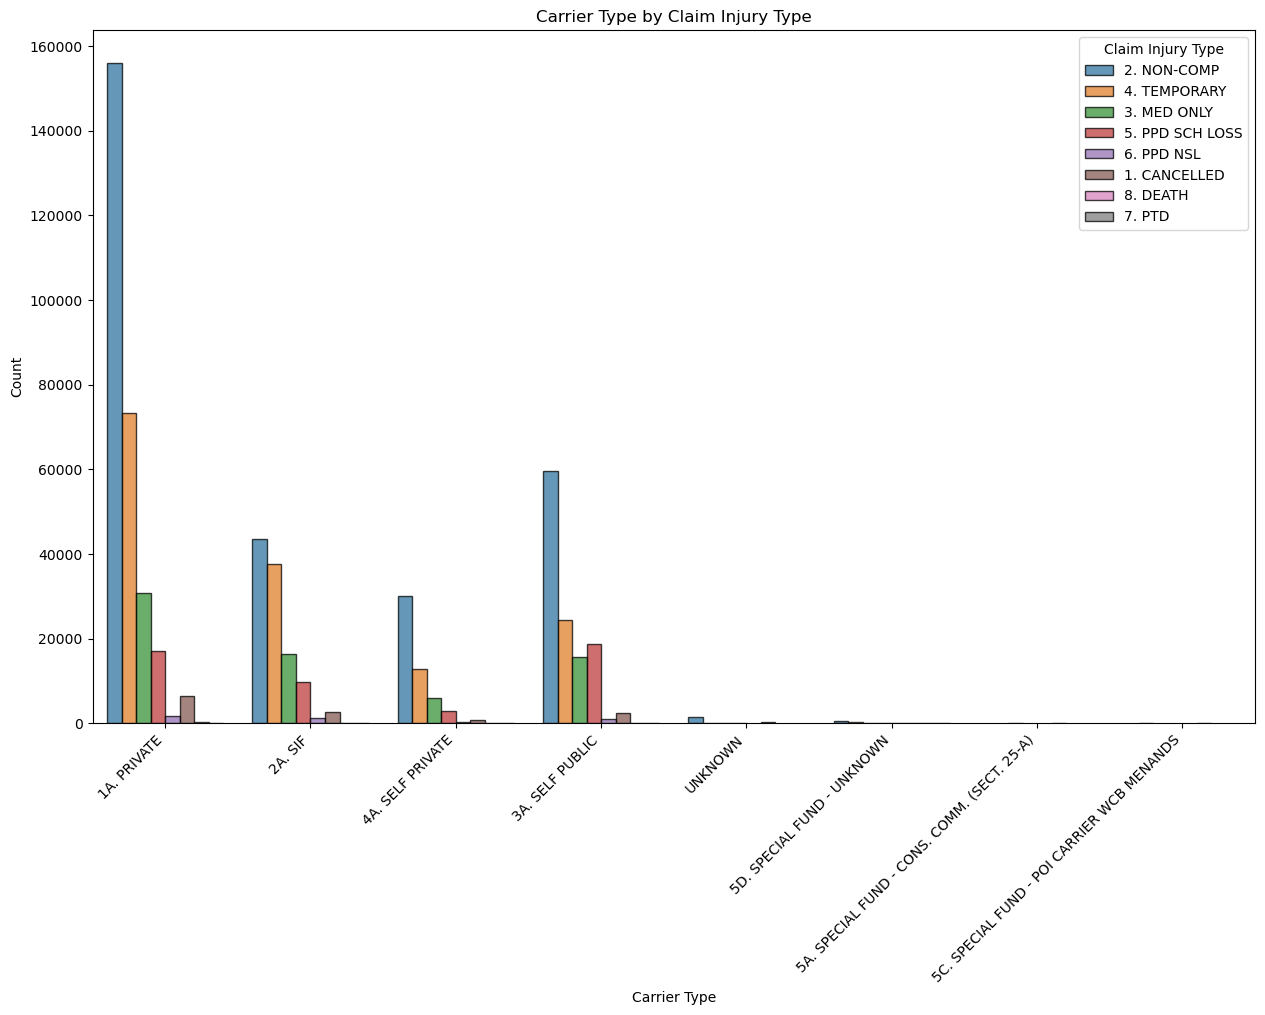

In [ ]:
# Carrier Type by Claim Injury Type
plt.figure(figsize=(15, 9))
sns.countplot(x='Carrier Type', hue='Claim Injury Type', data=train_data, alpha=0.75, edgecolor='black')
plt.title('Carrier Type by Claim Injury Type')
plt.xlabel('Carrier Type')
plt.ylabel('Count')
plt.legend(title='Claim Injury Type')
plt.xticks(rotation=45, ha='right')
plt.show()

#### COVID-19 Indicator by Claim Injury Type

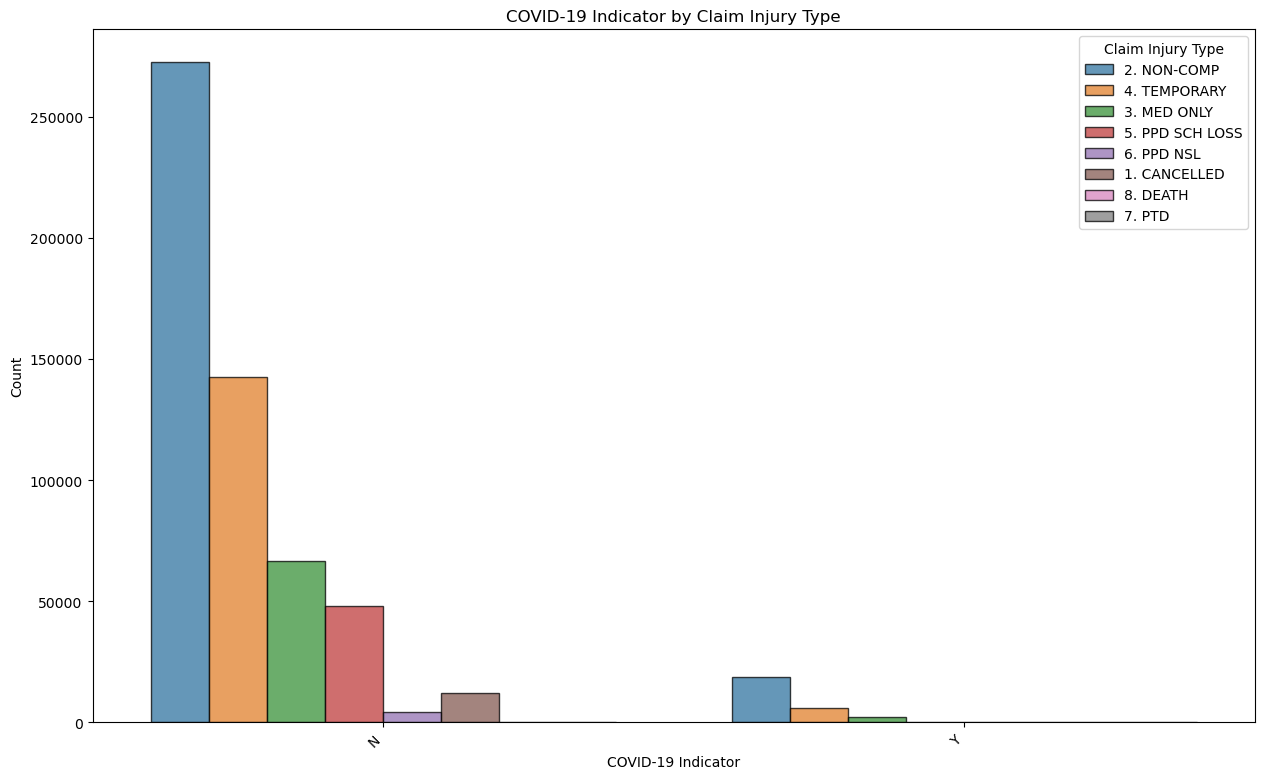

In [ ]:
# COVID-19 Indicator by Claim Injury Type
plt.figure(figsize=(15, 9))
sns.countplot(x='COVID-19 Indicator', hue='Claim Injury Type', data=train_data, alpha=0.75, edgecolor='black')
plt.title('COVID-19 Indicator by Claim Injury Type')
plt.xlabel('COVID-19 Indicator')
plt.ylabel('Count')
plt.legend(title='Claim Injury Type')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Average Weekly Wage by Attorney/Representative

C:\Users\inesm\AppData\Local\Temp\ipykernel_23808\269776512.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Attorney/Representative', y='Average Weekly Wage', data=train_data, estimator=np.mean, ci='sd', capsize=0.1)


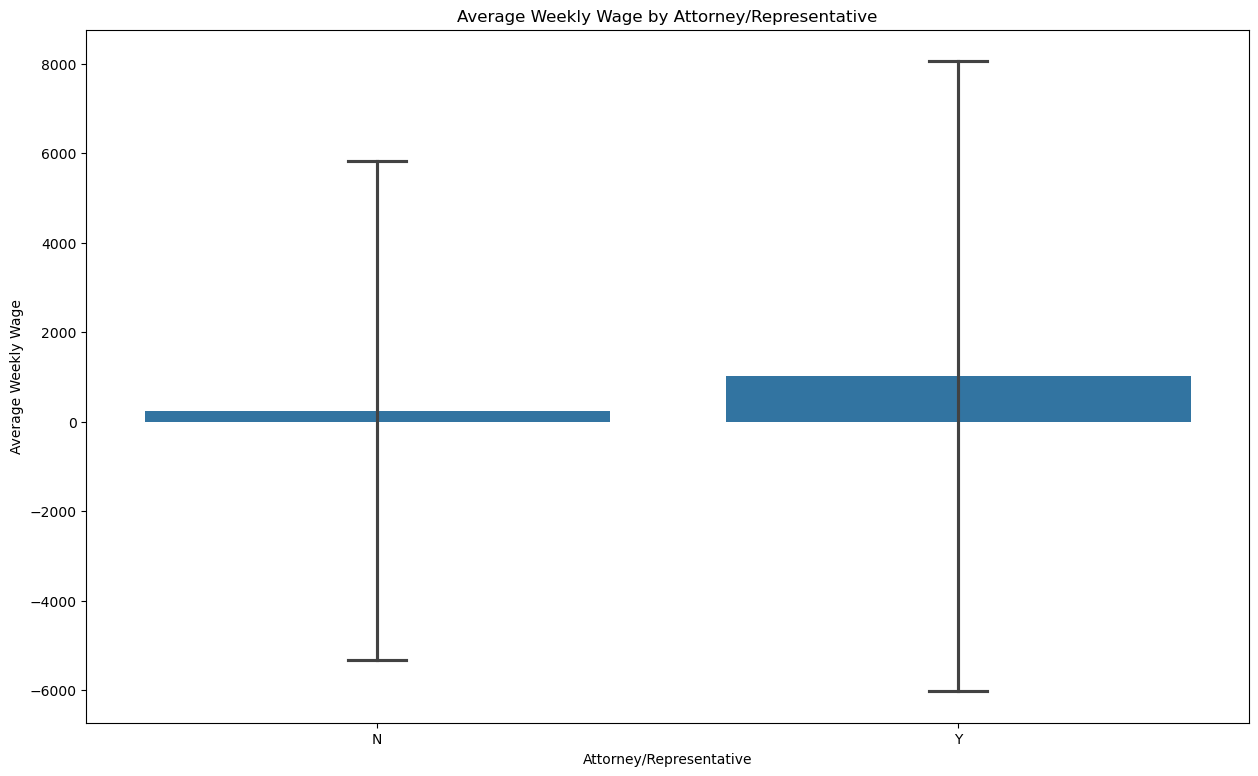

In [ ]:
plt.figure(figsize=(15, 9))
sns.barplot(x='Attorney/Representative', y='Average Weekly Wage', data=train_data, estimator=np.mean, ci='sd', capsize=0.1)
plt.title('Average Weekly Wage by Attorney/Representative')
plt.xlabel('Attorney/Representative')
plt.ylabel('Average Weekly Wage')
plt.show()


#### Pairwise Relationship of Numerical Variables

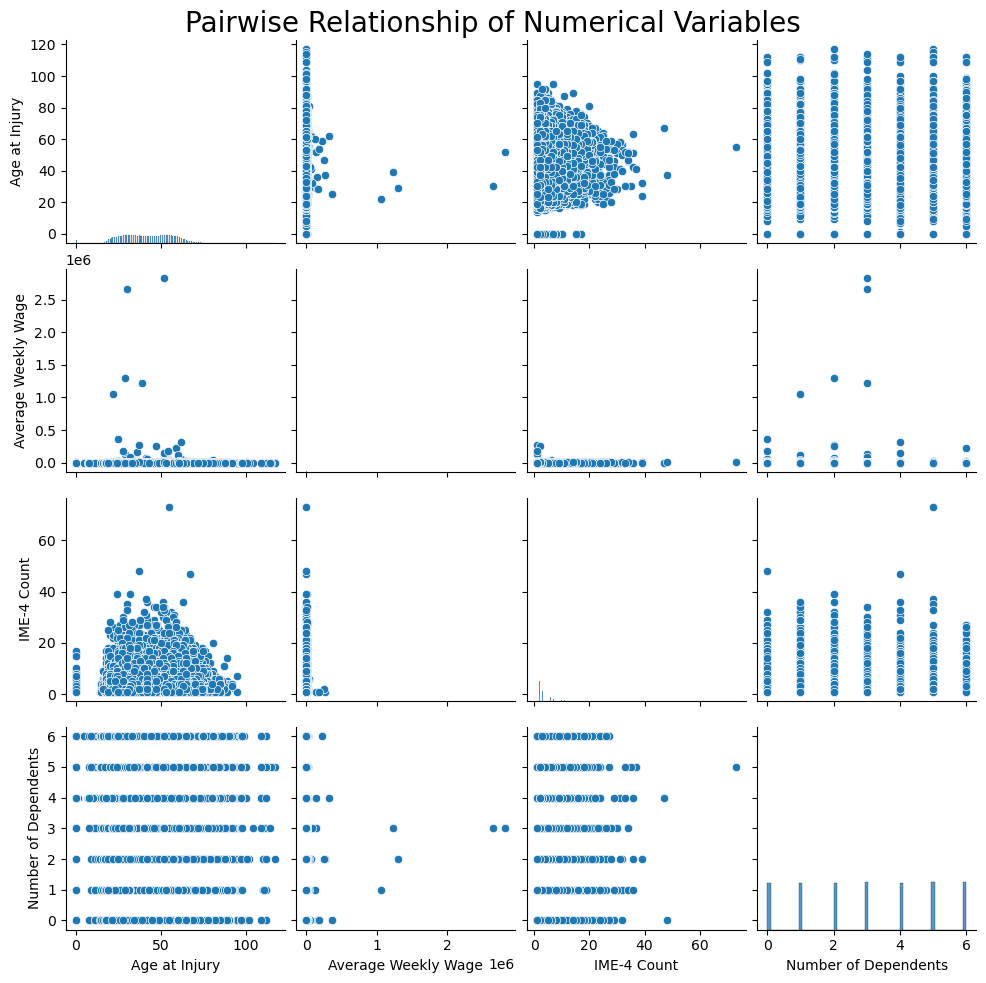

In [ ]:
sns.pairplot(train_data[num_feat], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

---

### 2.1.8 Feature Engineering